### 姚泽洲  3220231262

### 数据分析要求
#### 3.1 数据摘要和可视化
**数据摘要**

 标称属性，给出每个可能取值的频数  
 
 数值属性，给出5数概括及缺失值的个数

**数据可视化**

 使用直方图、盒图等检查数据分布及离群点

#### 3.2 数据缺失的处理
观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

将缺失部分剔除

用最高频率值来填补缺失值

通过属性的相关关系来填补缺失值

通过数据对象之间的相似性来填补缺失值

注意：在处理后完成，要对比新旧数据集的差异。

### 提交内容
分析过程报告（PDF格式）
程序所在代码仓库地址（使用Github或码云），仓库中应包含完整的处理数据的代码和使用说明
所选择的数据集在仓库的README文件中说明
相关的数据文件不要上传到代码仓库中
建议：使用Jupyter Notebook将分析报告和代码组织在一起，使用Notebook的导出功能将报告导出为PDF格式的文件上传到乐学。

In [1]:
import numpy as np
import pandas as pd 

github_data = pd.read_csv('dataset/github_dataset.csv') #加载数据集

github_data.columns #查看列标签

Index(['repositories', 'stars_count', 'forks_count', 'issues_count',
       'pull_requests', 'contributors', 'language'],
      dtype='object')

预处理的数据集来自 [GitHub Dataset](https://www.kaggle.com/datasets/nikhil25803/github-dataset?select=repository_data.csv)

### 数据摘要

**标称属性** 给出每个可能取值的频数  
 
**数值属性** 给出5数概括及缺失值的个数

In [2]:
github_data.info() #查看数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   repositories   1052 non-null   object
 1   stars_count    1052 non-null   int64 
 2   forks_count    1052 non-null   int64 
 3   issues_count   1052 non-null   int64 
 4   pull_requests  1052 non-null   int64 
 5   contributors   1052 non-null   int64 
 6   language       907 non-null    object
dtypes: int64(5), object(2)
memory usage: 57.7+ KB


In [3]:
github_data.head(3) #展示前三行object示例

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,NaN
1,EddieHubCommunity/support,271,150,536,6,71,NaN
2,ethereum/aleth,0,0,313,27,154,C++


#### 标称属性

**repositories** - the name of the repository (Format - github_username/repository_name)，存储库的名称

**language** - primary language used in the project，项目使用的主要语言

In [4]:
github_data['repositories'].value_counts() #获取repositories每个可能取值的频数

kameshsampath/ansible-role-rosa-demos         2
aloisdeniel/bluff                             2
antoniaandreou/github-slideshow               2
jgthms/bulma-start                            2
artkirienko/hlds-docker-dproto                2
                                             ..
WhiteHouse/CIOmanagement                      1
0xCaso/defillama-telegram-bot                 1
ethereum/blake2b-py                           1
openfoodfacts/folksonomy_mobile_experiment    1
gamemann/All_PropHealth                       1
Name: repositories, Length: 972, dtype: int64

In [5]:
github_data['language'].value_counts() #获取language每个可能取值的频数

JavaScript          253
Python              155
HTML                 72
Java                 44
CSS                  37
TypeScript           37
Dart                 36
C++                  29
Jupyter Notebook     29
Ruby                 28
C                    26
Shell                25
PHP                  16
Go                   15
Rust                 10
Swift                10
C#                    8
Objective-C           8
Kotlin                7
Makefile              6
Jinja                 5
SCSS                  4
CoffeeScript          3
Perl                  3
Dockerfile            3
Solidity              3
AutoHotkey            3
Hack                  2
Pawn                  2
CodeQL                2
PowerShell            2
Assembly              2
Vim Script            2
Vue                   2
Elixir                2
Gherkin               1
QMake                 1
CMake                 1
Oz                    1
Cuda                  1
QML                   1
ActionScript    

#### 数值属性

**stars_count** - stars count of the repository

**forks_count** - fork count of the repository

**issues_count** - active/opened issues in the repository

**pull_requests** - pull requests opened in the repository

**contributors** - contributors contribute to the project so far

In [6]:
github_data['stars_count'].describe() #获取stars_count的分布，包括计数，均值，标准差，最小值，25%，50%，75%，最大值

count    1052.000000
mean       81.976236
std       170.403116
min         0.000000
25%         1.000000
50%        12.000000
75%        65.250000
max       995.000000
Name: stars_count, dtype: float64

In [7]:
numeric_describe = github_data.describe() #获取所有数值属性的分布
numeric_describe

,stars_count,forks_count,issues_count,pull_requests,contributors
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,81.976236,53.884981,8.656844,4.374525,8.364068
std,170.403116,127.699729,32.445154,27.913732,37.511807
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000
50%,12.000000,6.000000,2.000000,0.000000,2.000000
75%,65.250000,38.250000,6.000000,2.000000,4.000000
max,995.000000,973.000000,612.000000,567.000000,658.000000


In [8]:
numeric_describe.loc[['min', '25%', '50%', '75%', 'max']] #获取数值属性的五数概括

,stars_count,forks_count,issues_count,pull_requests,contributors
min,0.00,0.00,1.0,0.0,0.0
25%,1.00,1.00,1.0,0.0,0.0
50%,12.00,6.00,2.0,0.0,2.0
75%,65.25,38.25,6.0,2.0,4.0
max,995.00,973.00,612.0,567.0,658.0


In [9]:
missing_counts = pd.DataFrame(github_data.isnull().sum(), columns=['missing_counts']).T #获取缺失值数量
missing_counts

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
missing_counts,0,0,0,0,0,0,145


### 数据可视化

 使用直方图、盒图等检查数据分布及离群点

In [10]:
repositories_counts = pd.DataFrame(github_data['repositories'].value_counts()).rename(columns={'repositories': 'repositories_count'})
repositories_counts

,repositories_count
kameshsampath/ansible-role-rosa-demos,2
aloisdeniel/bluff,2
antoniaandreou/github-slideshow,2
jgthms/bulma-start,2
artkirienko/hlds-docker-dproto,2
...,...
WhiteHouse/CIOmanagement,1
0xCaso/defillama-telegram-bot,1
ethereum/blake2b-py,1
openfoodfacts/folksonomy_mobile_experiment,1


<BarContainer object of 972 artists>

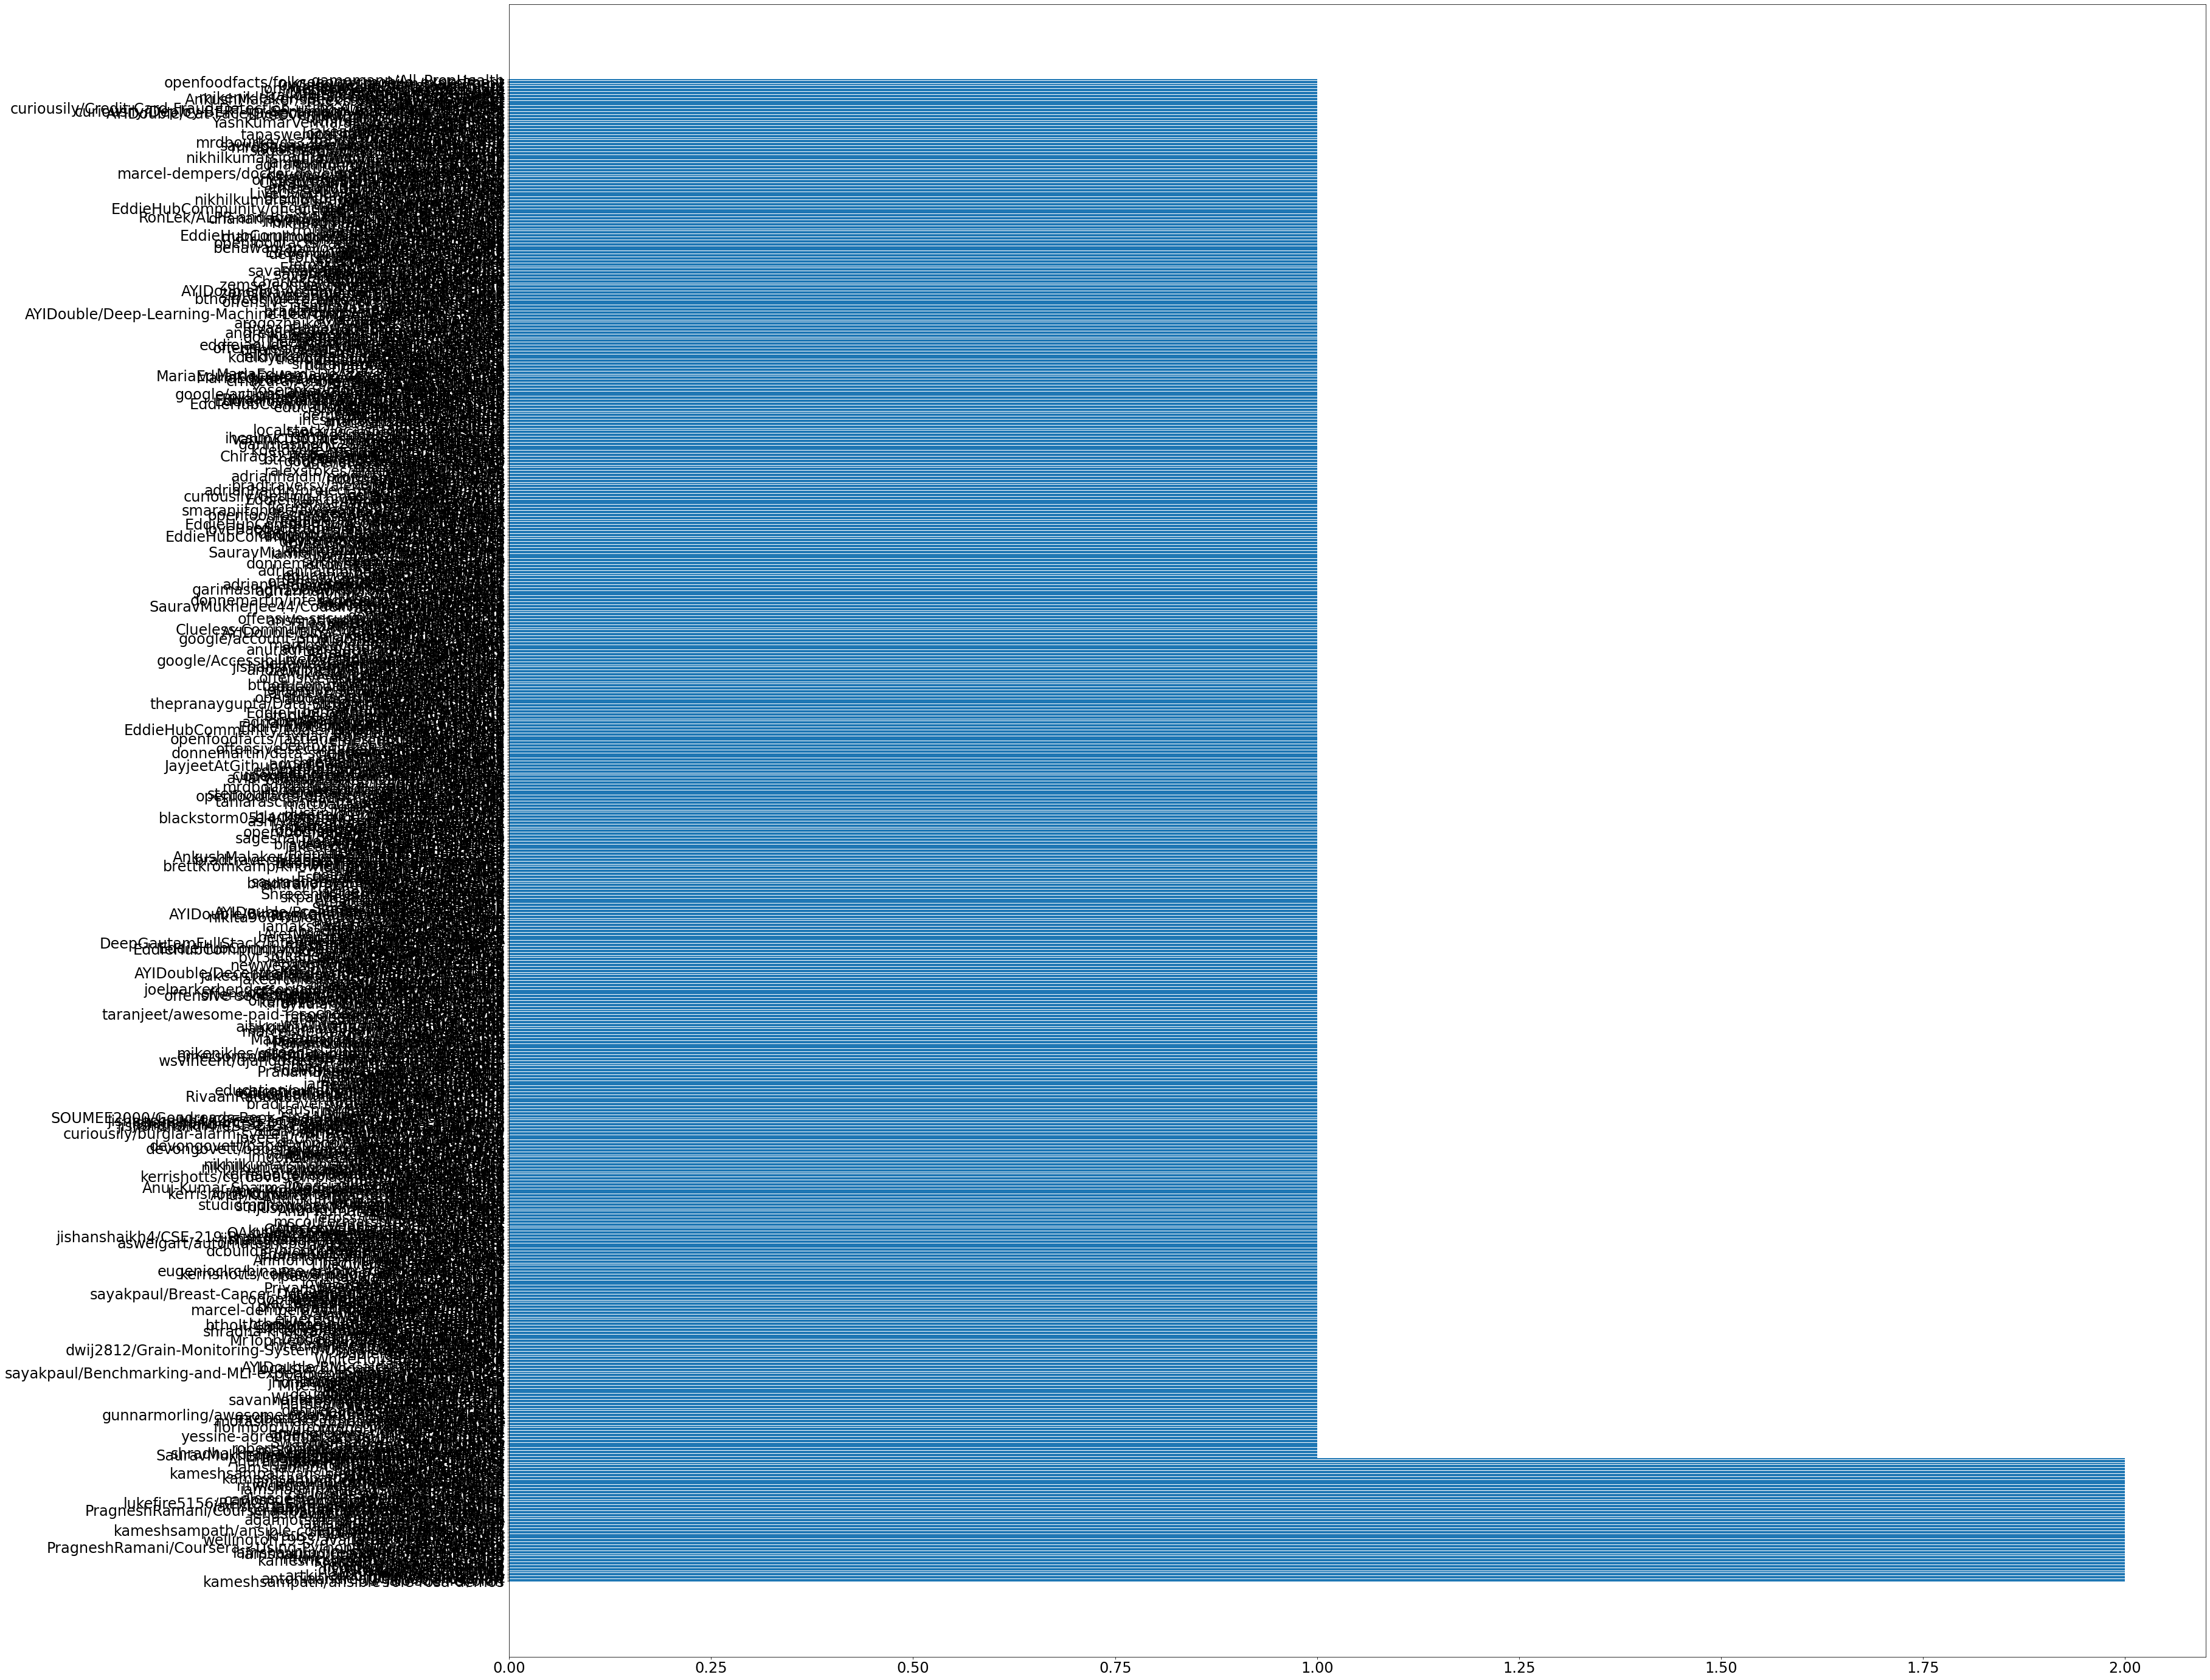

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 50))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(repositories_counts.index, width=repositories_counts['repositories_count'])  #repositories直方图

In [12]:
language_counts = pd.DataFrame(github_data['language'].value_counts()).rename(columns={'language': 'language_count'})
language_counts

,language_count
JavaScript,253
Python,155
HTML,72
Java,44
CSS,37
TypeScript,37
Dart,36
C++,29
Jupyter Notebook,29
Ruby,28


<BarContainer object of 51 artists>

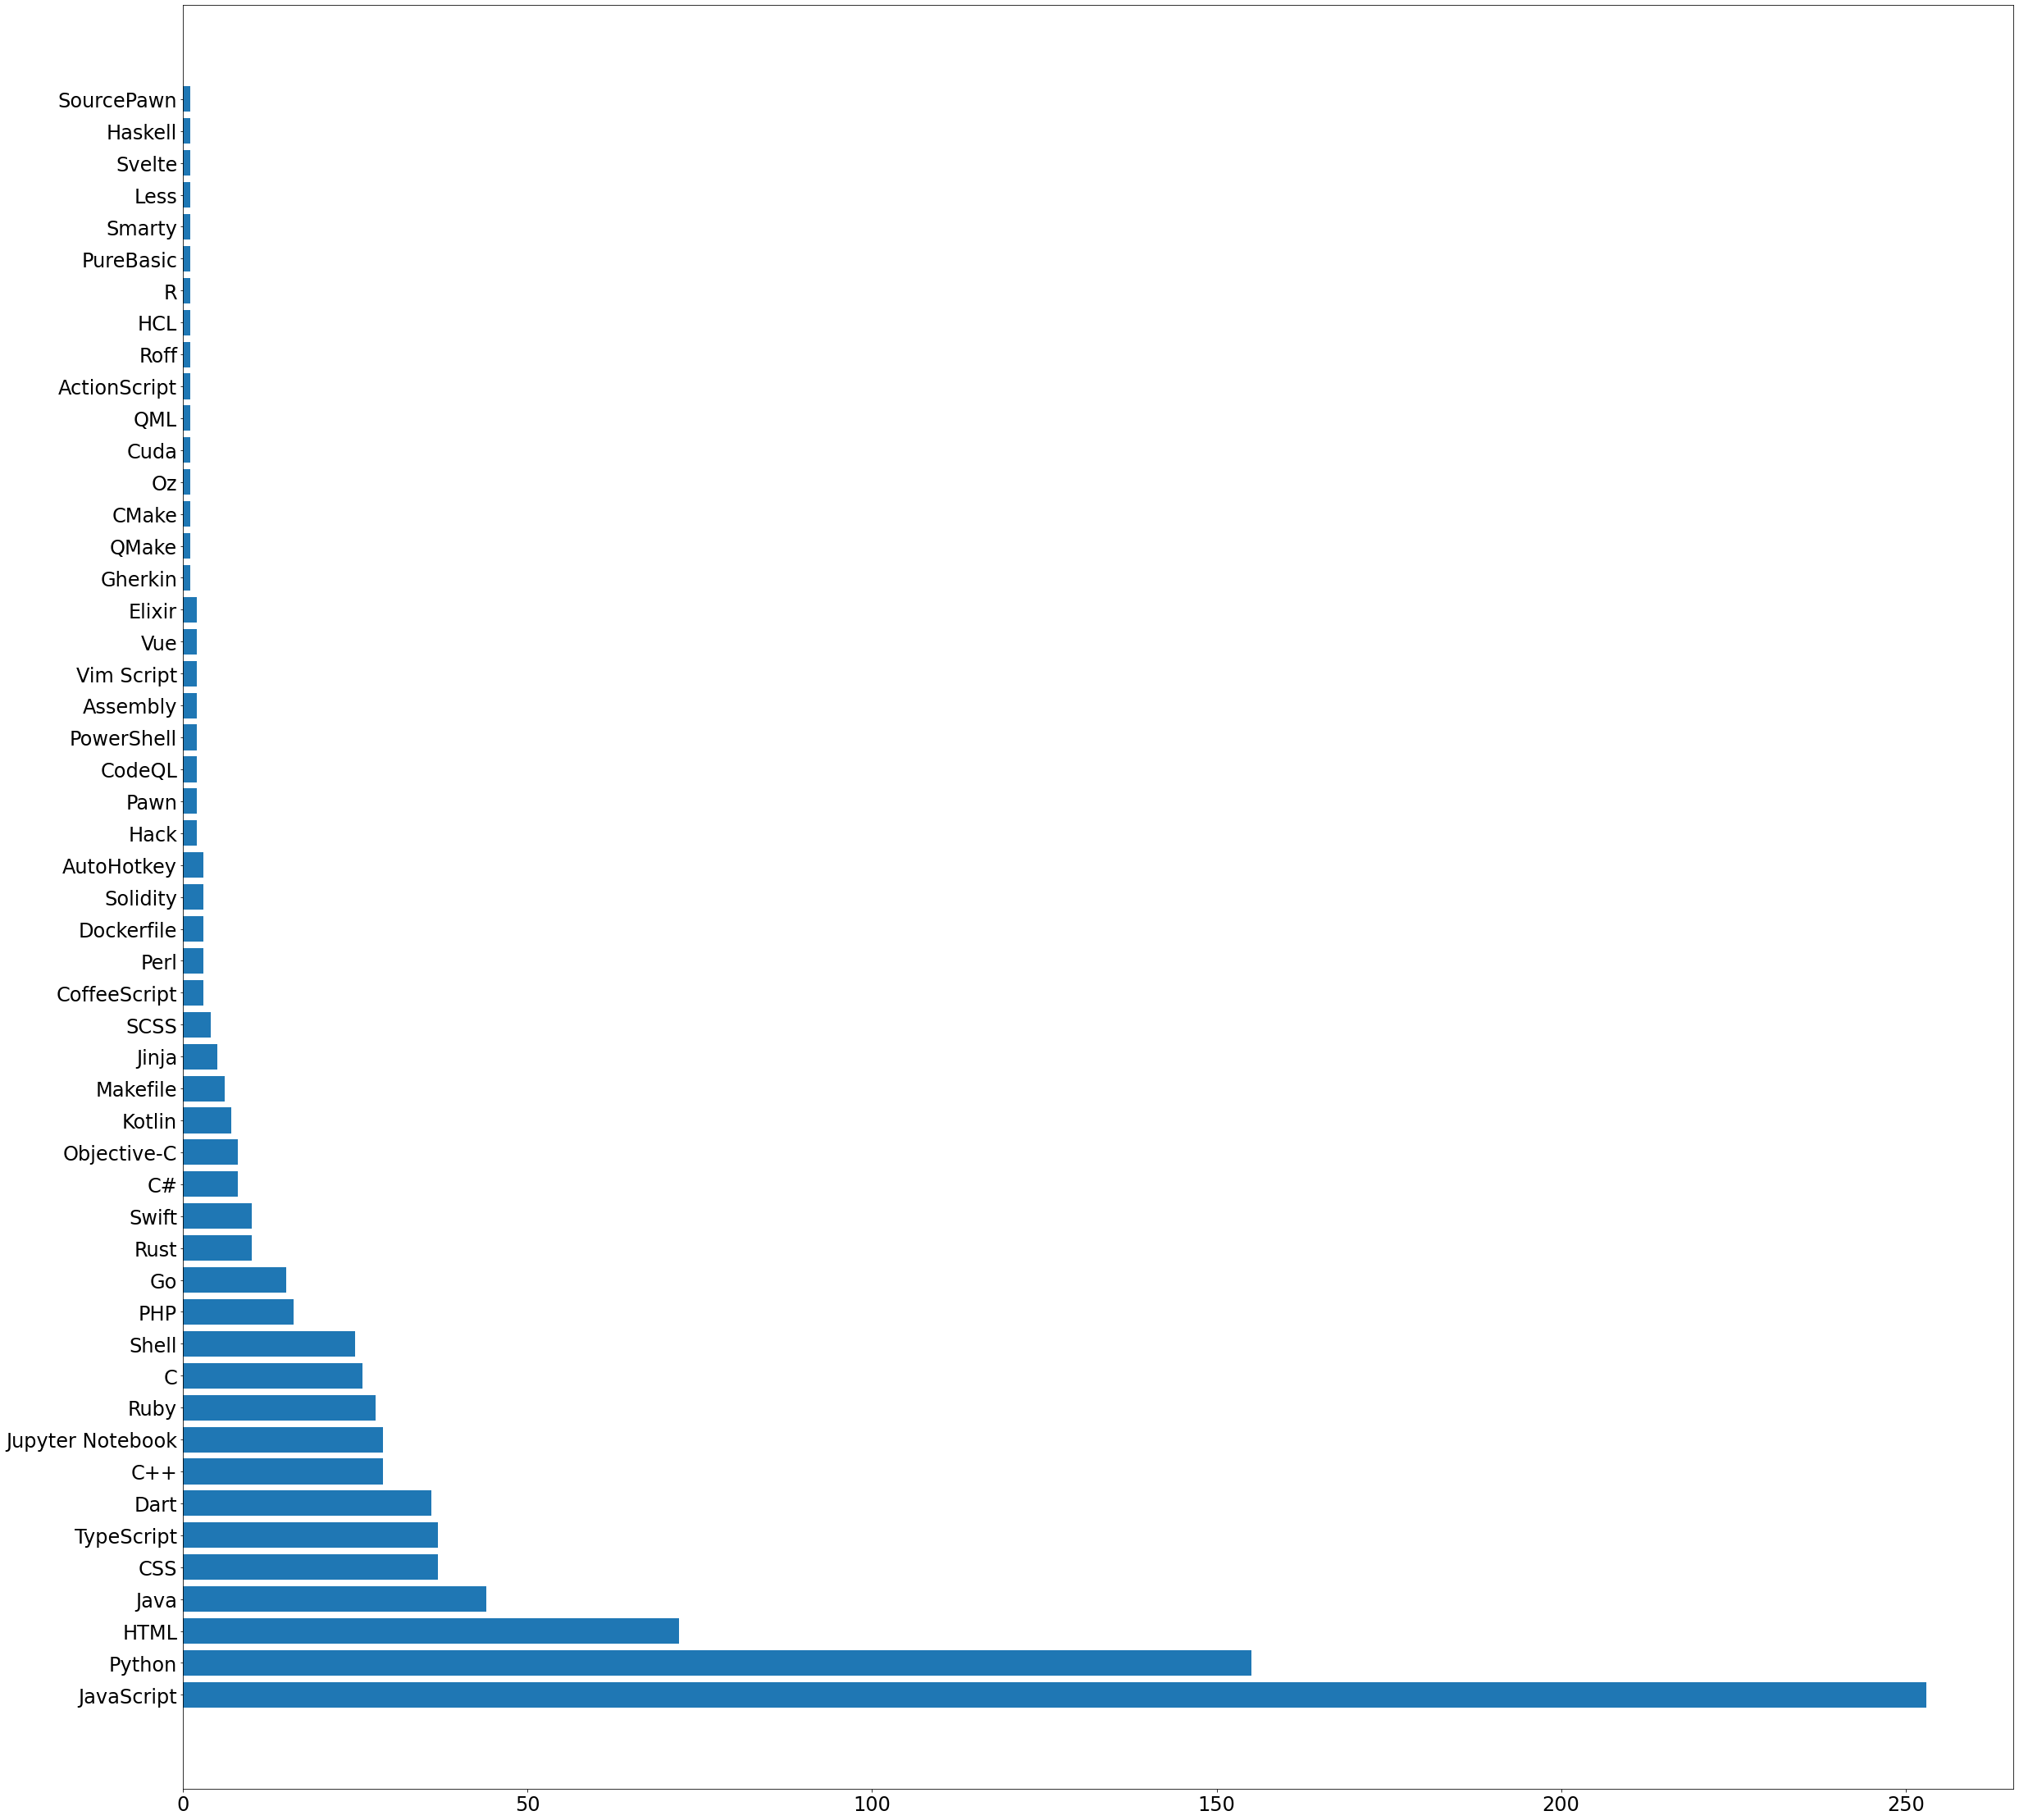

In [13]:
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(language_counts.index, width=language_counts['language_count'])  #language直方图

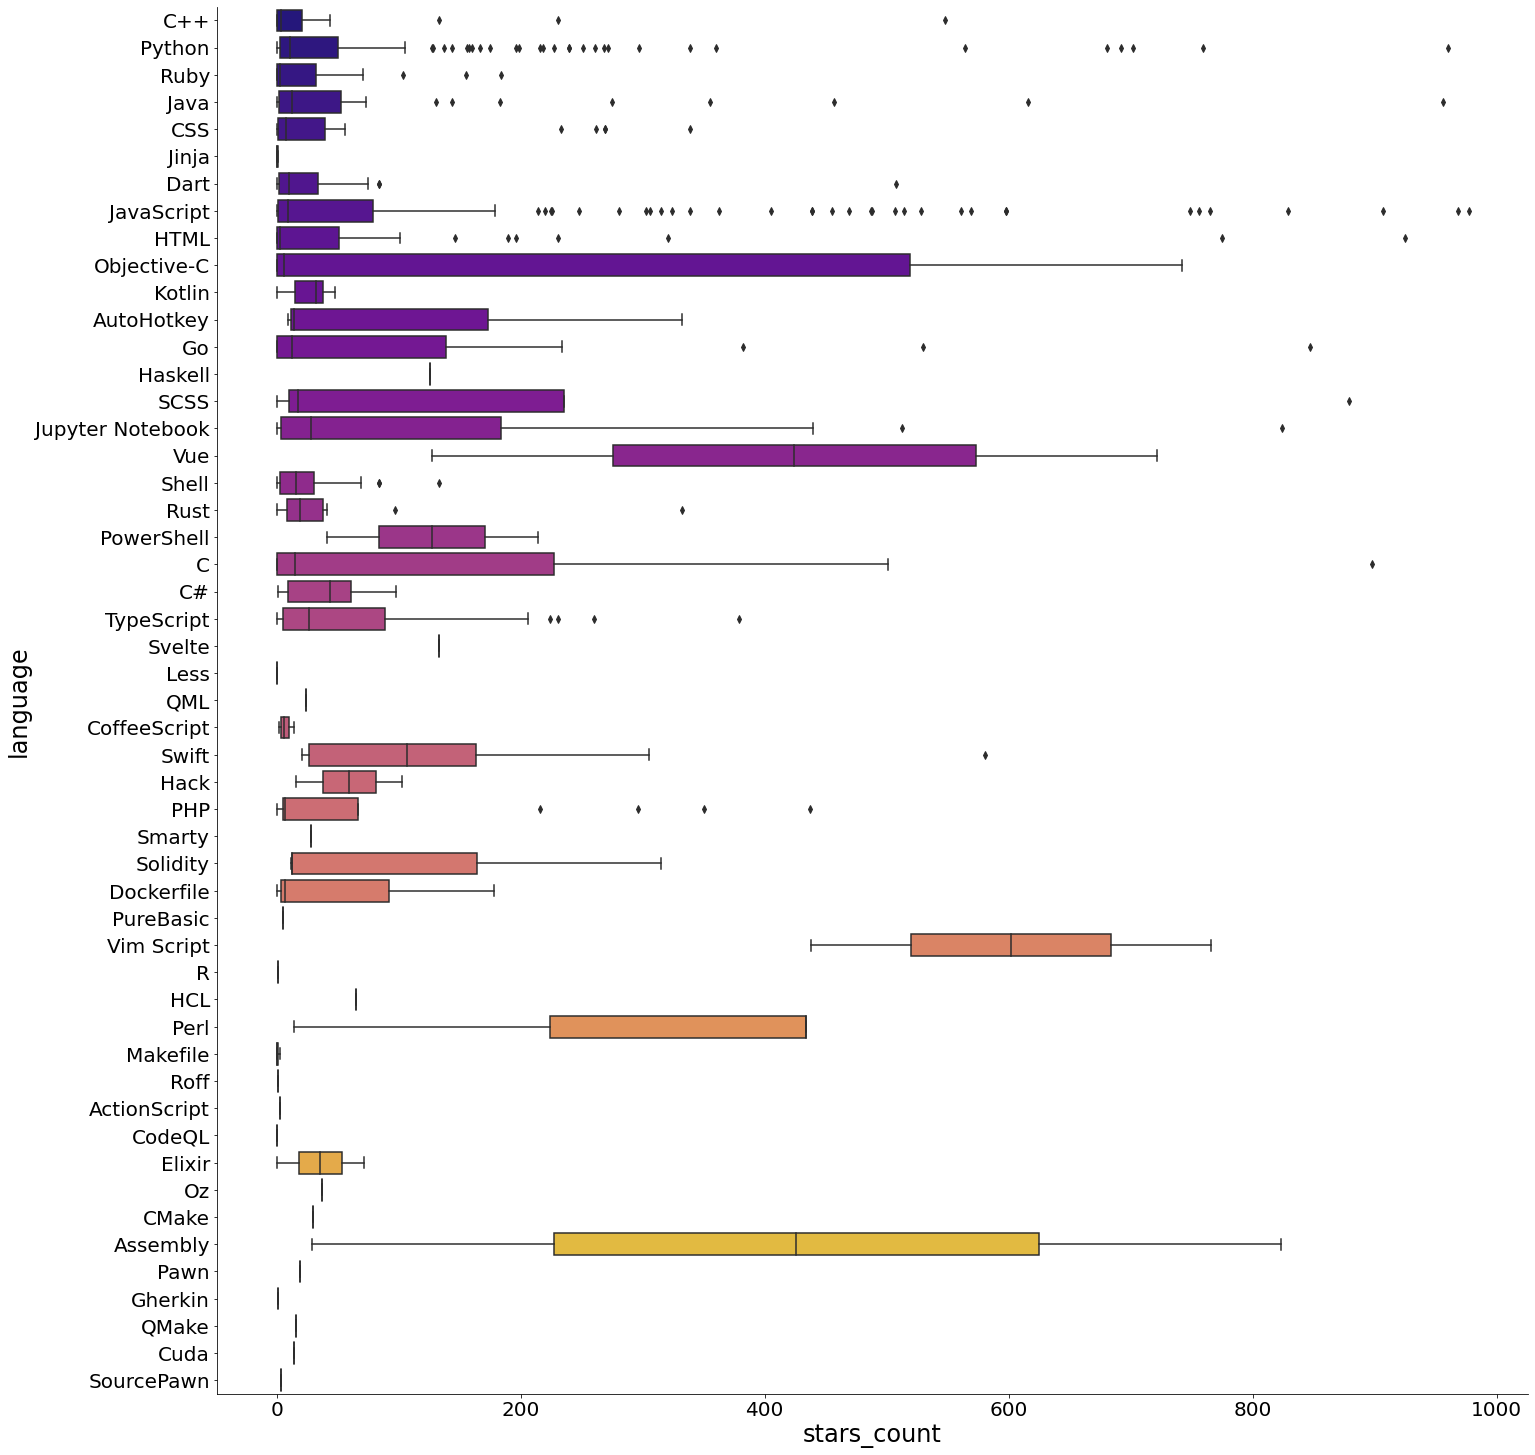

In [14]:
stars_count_box = sns.catplot(data=github_data, kind='box', y='language', x='stars_count', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('language', fontsize=24, )
plt.xlabel('stars_count', fontsize=24)
plt.show()  #输出每一个语言对应的所有存储库的stars_count盒图并显示离群值

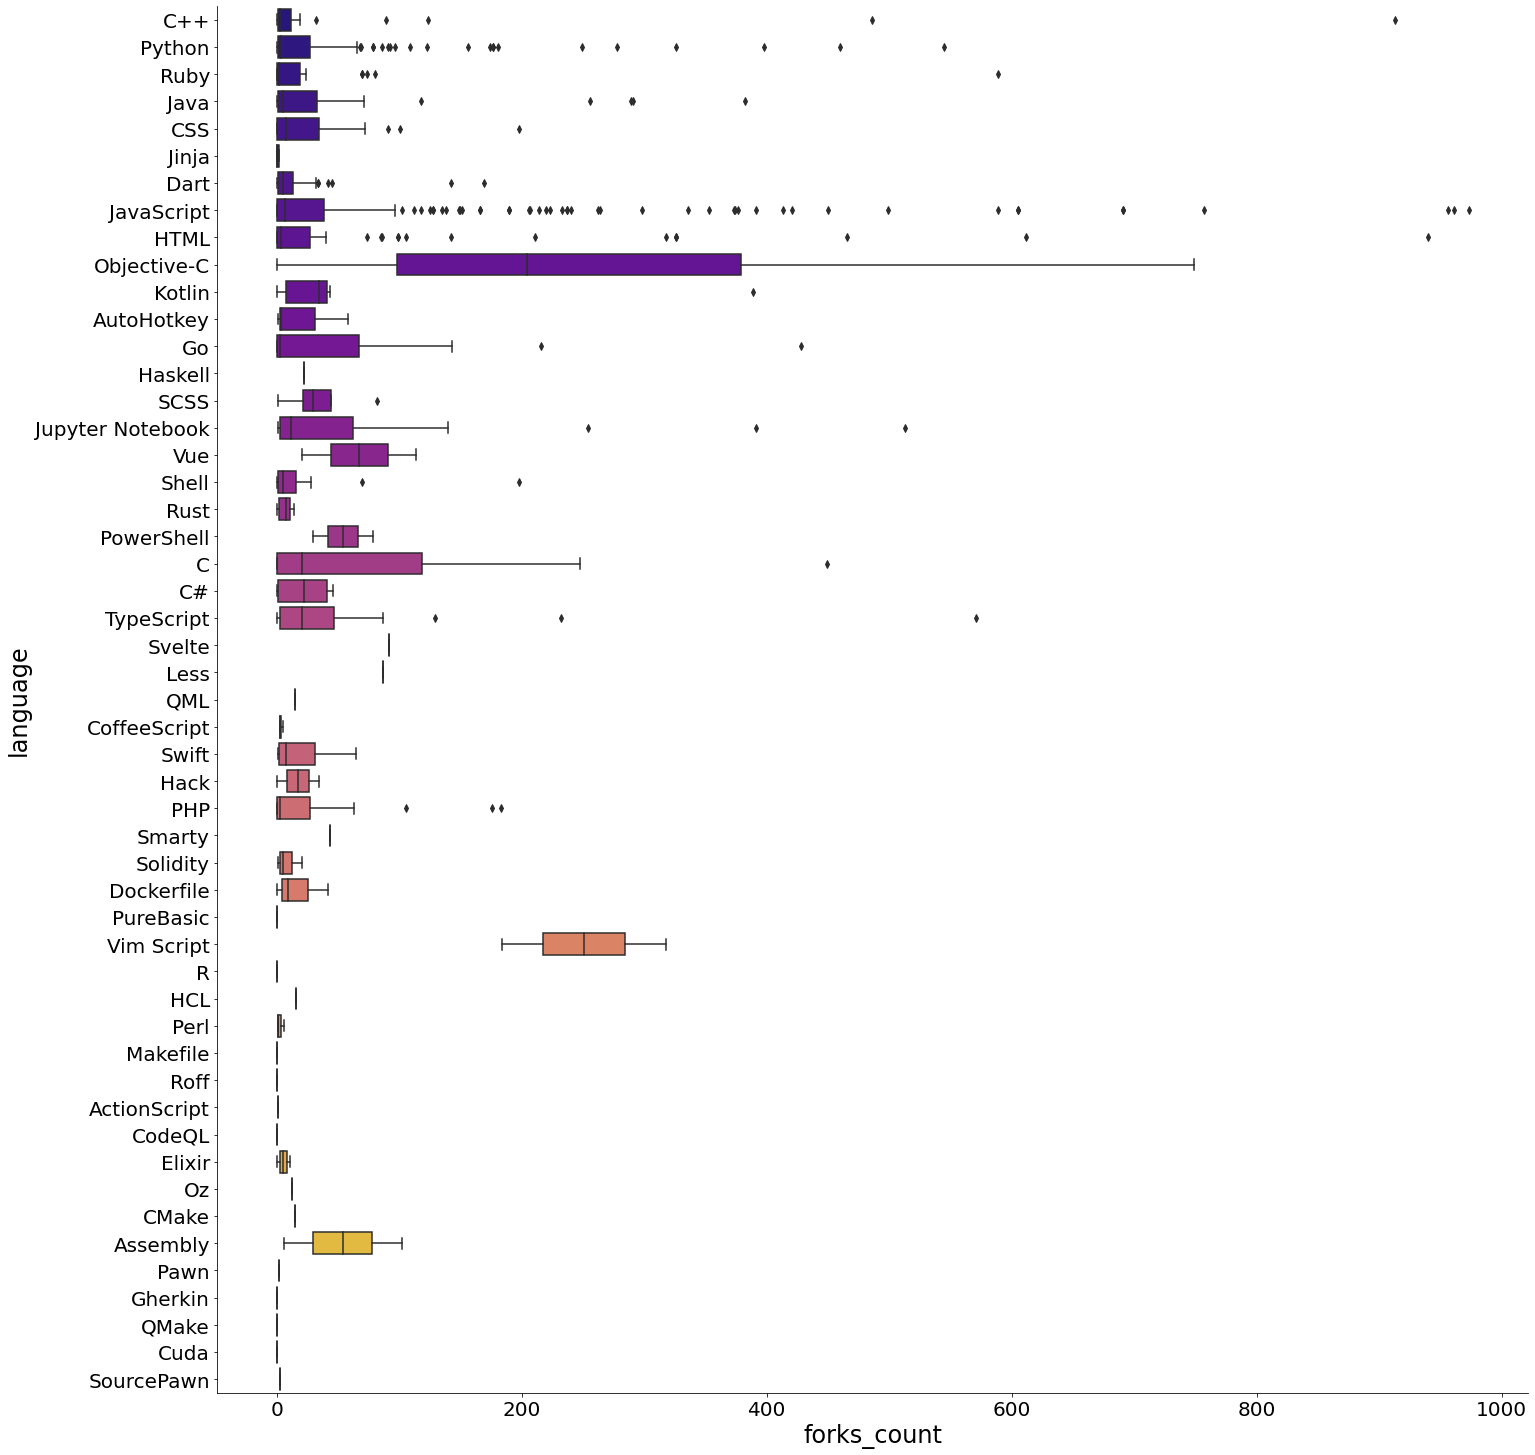

In [15]:
forks_count_box = sns.catplot(data=github_data, kind='box', y='language', x='forks_count', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('language', fontsize=24, )
plt.xlabel('forks_count', fontsize=24)
plt.show()  #输出每一个语言对应的所有存储库的forks_count盒图并显示离群值

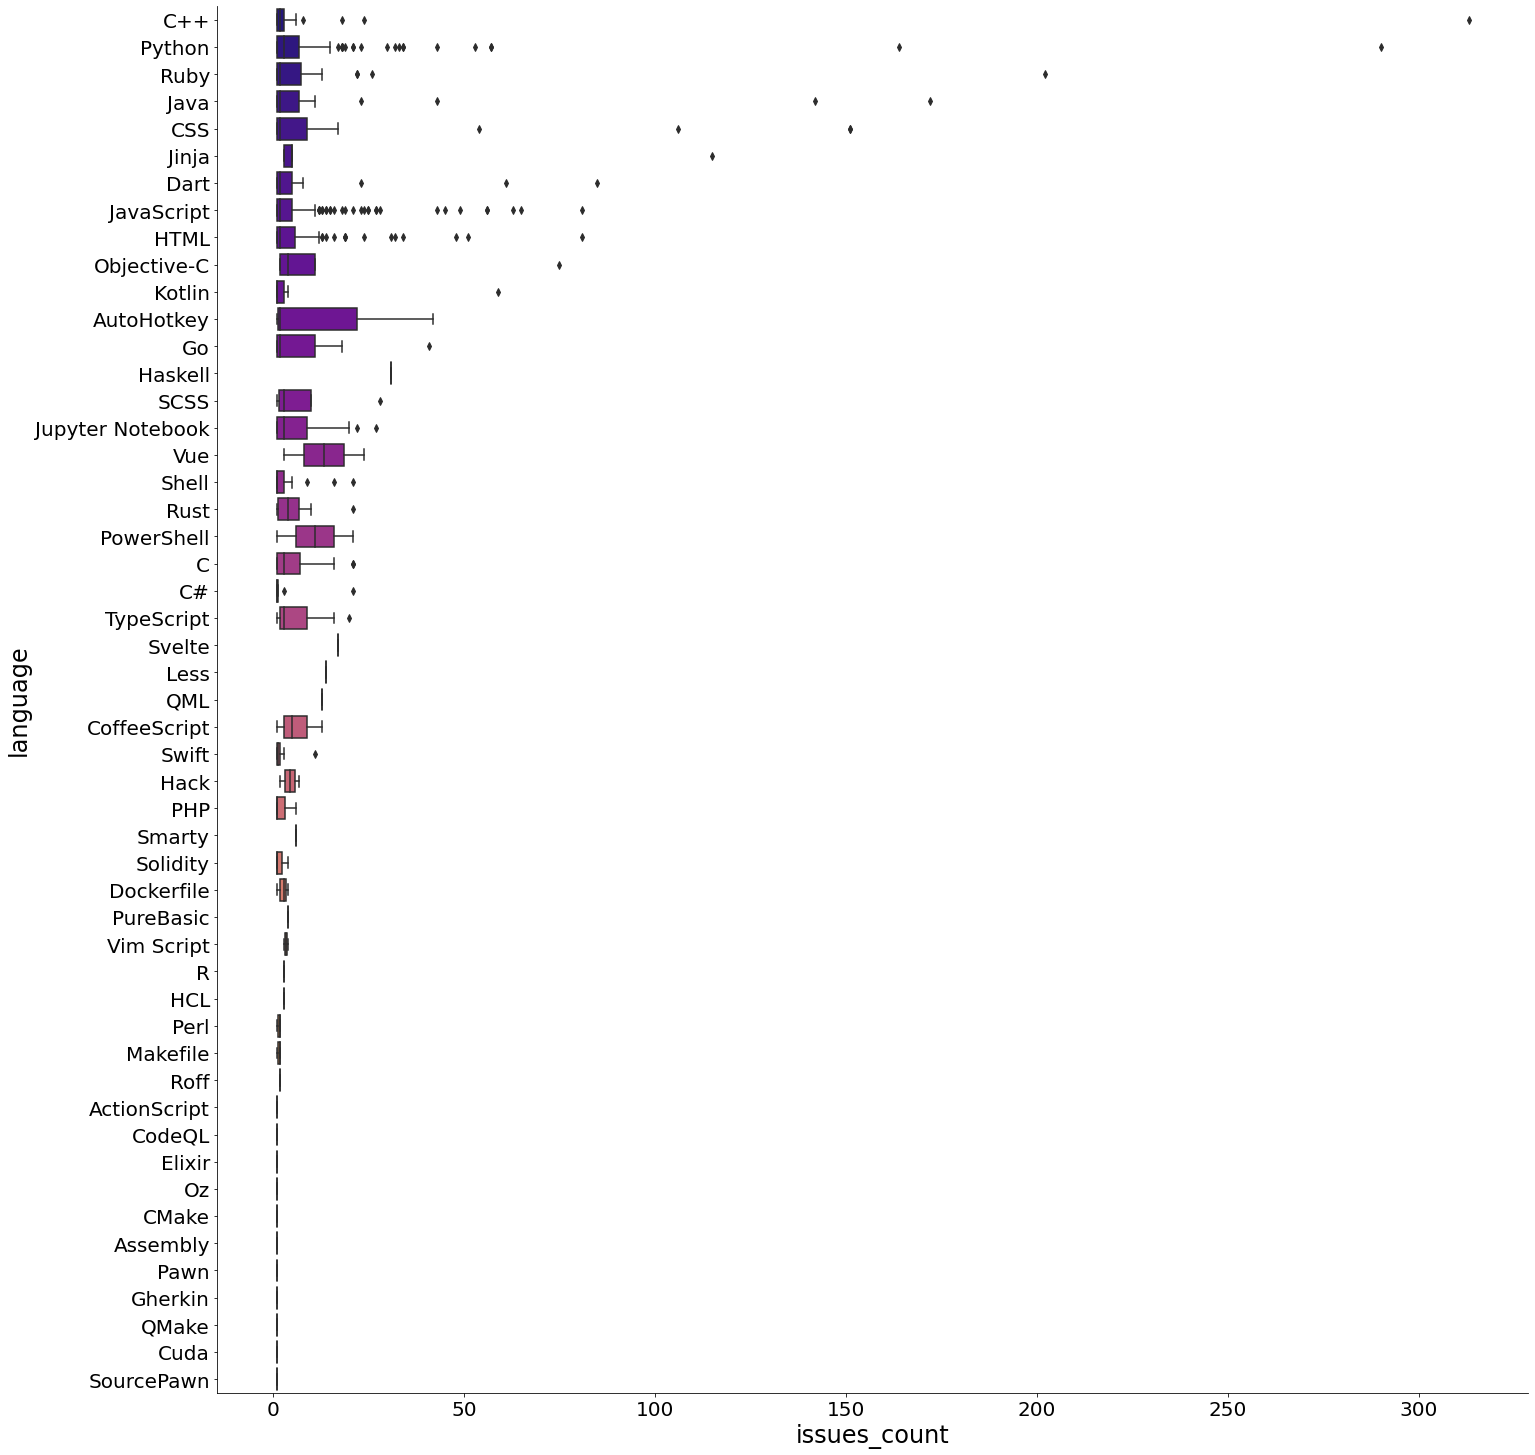

In [16]:
issues_count_box = sns.catplot(data=github_data, kind='box', y='language', x='issues_count', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('language', fontsize=24, )
plt.xlabel('issues_count', fontsize=24)
plt.show()  #输出每一个语言对应的所有存储库的issues_count盒图并显示离群值

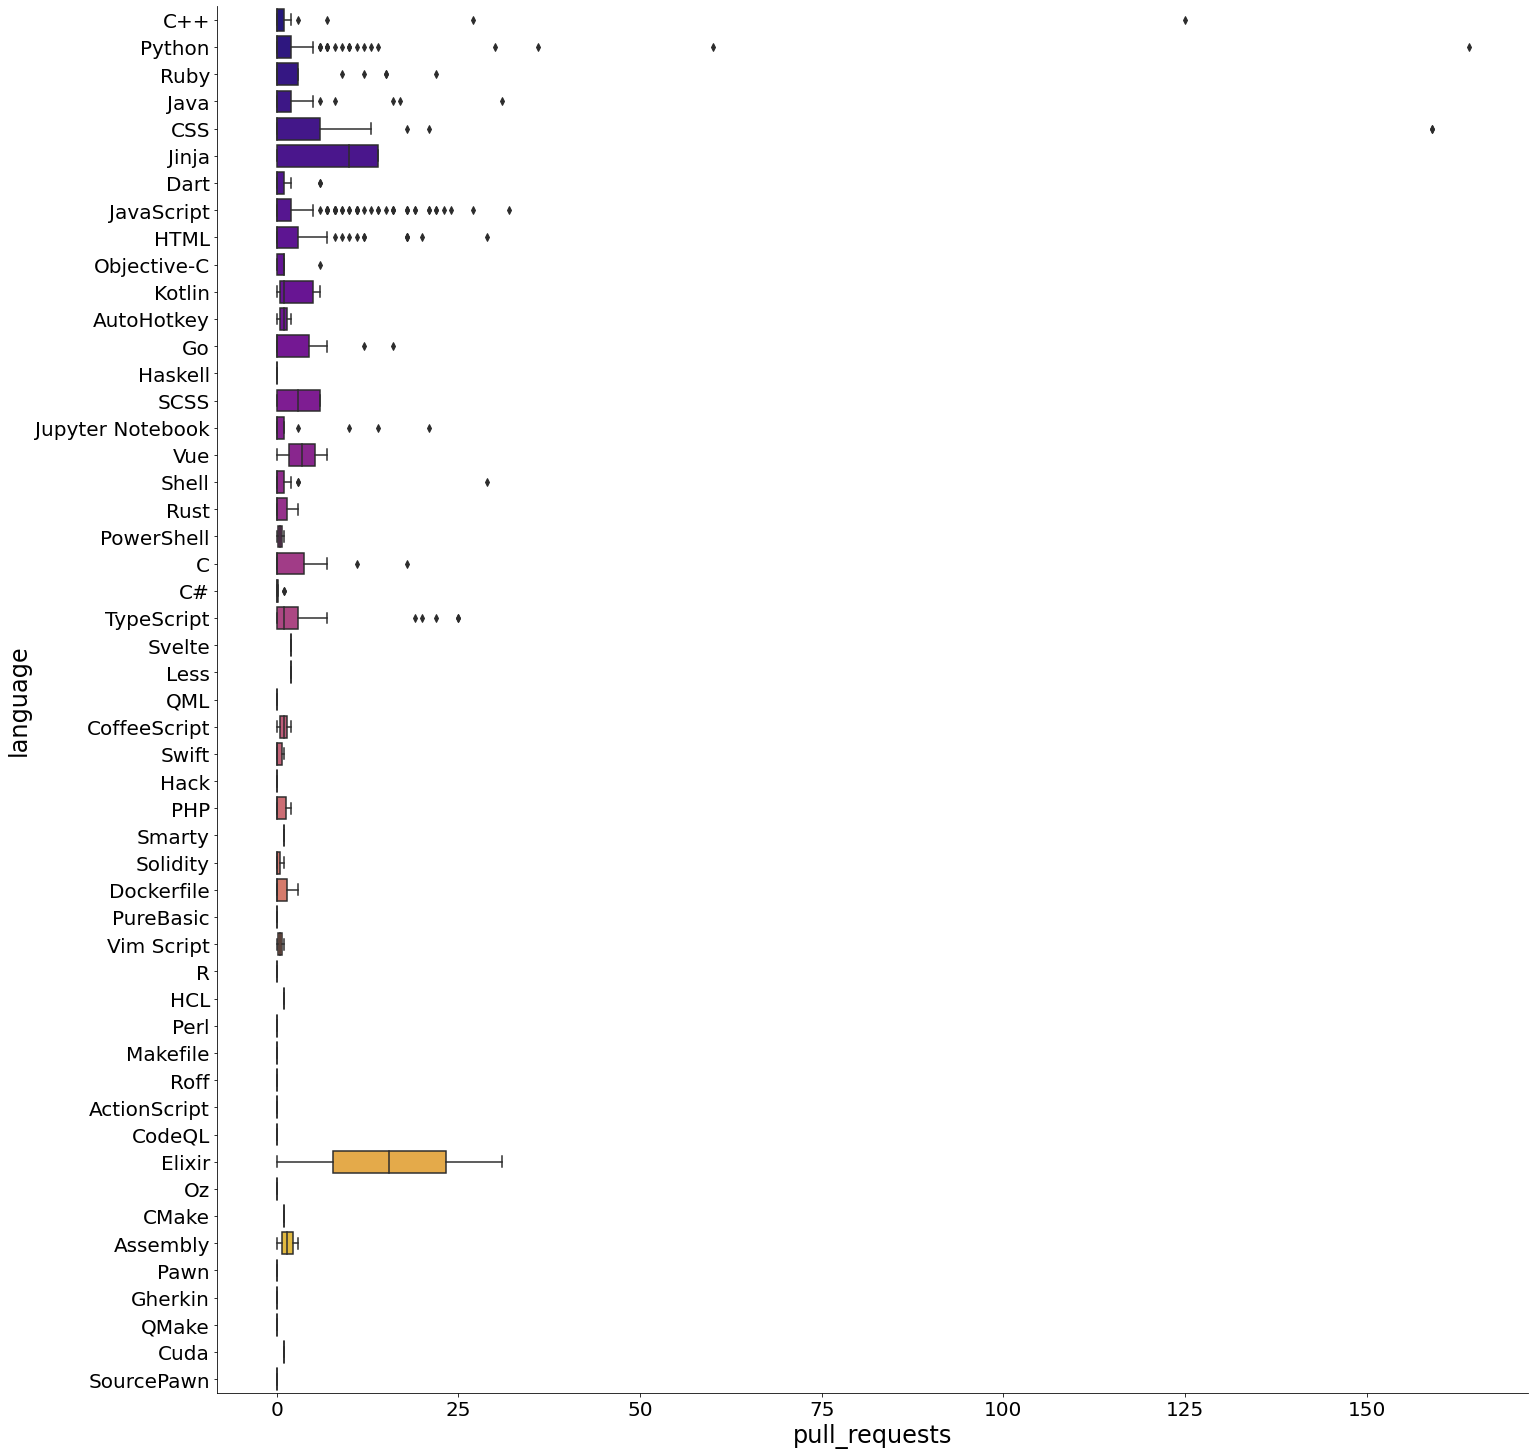

In [17]:
pull_requests_box = sns.catplot(data=github_data, kind='box', y='language', x='pull_requests', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('language', fontsize=24, )
plt.xlabel('pull_requests', fontsize=24)
plt.show()  #输出每一个语言对应的所有存储库的stars_count盒图并显示离群值

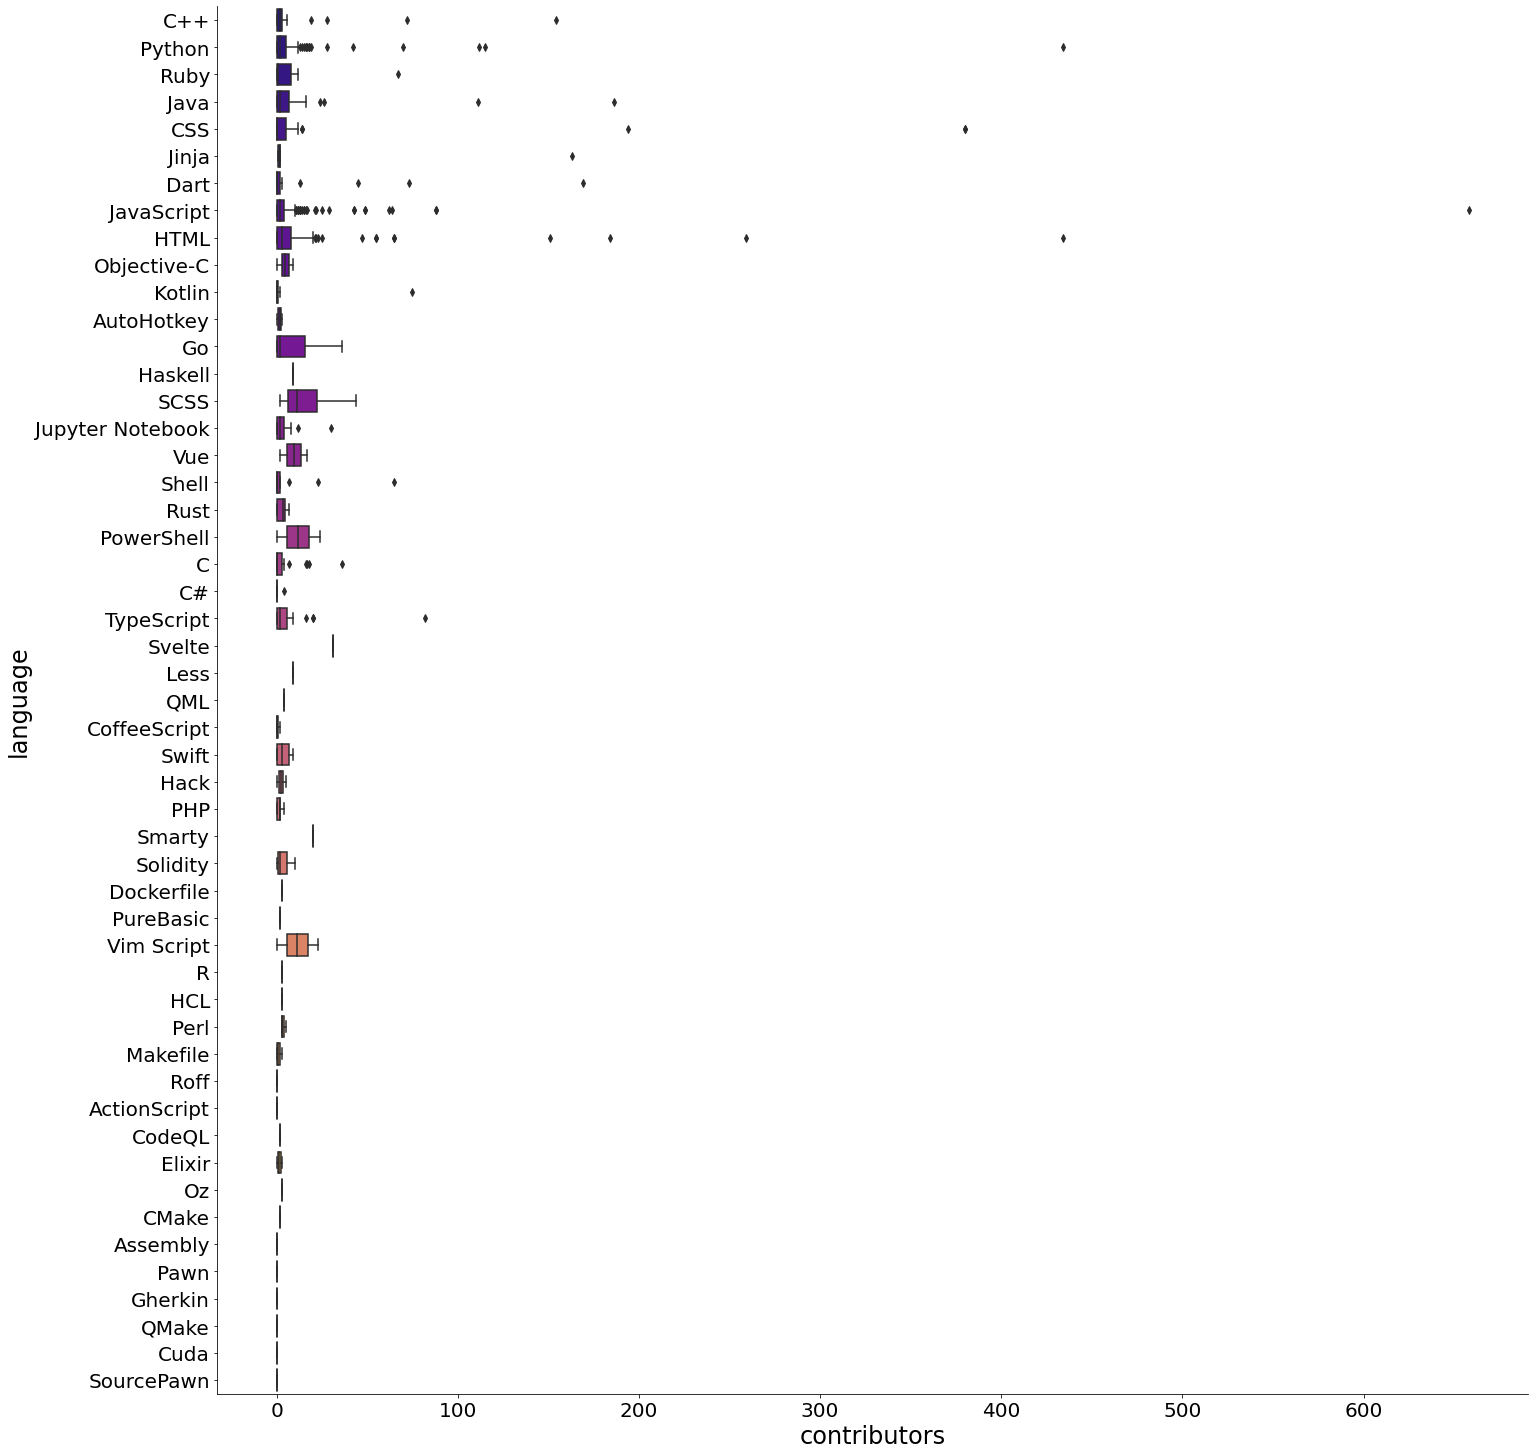

In [18]:
contributors_box = sns.catplot(data=github_data, kind='box', y='language', x='contributors', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('language', fontsize=24, )
plt.xlabel('contributors', fontsize=24)
plt.show()  #输出每一个语言对应的所有存储库的stars_count盒图并显示离群值

In [19]:
numeric_counts = pd.DataFrame(list(github_data['stars_count']), columns=['counts'])
numeric_counts = pd.DataFrame(numeric_counts, columns=['numeric_attribution', 'counts'])
numeric_counts['numeric_attribution'] = 'stars_count'
numeric_counts = numeric_counts.append(pd.DataFrame([['forks_count', c] for c in list(github_data['forks_count'])], columns=['numeric_attribution', 'counts']), ignore_index=True)
numeric_counts = numeric_counts.append(pd.DataFrame([['issues_count', c] for c in list(github_data['issues_count'])], columns=['numeric_attribution', 'counts']), ignore_index=True)
numeric_counts = numeric_counts.append(pd.DataFrame([['pull_requests', c] for c in list(github_data['pull_requests'])], columns=['numeric_attribution', 'counts']), ignore_index=True)
numeric_counts = numeric_counts.append(pd.DataFrame([['contributors', c] for c in list(github_data['contributors'])], columns=['numeric_attribution', 'counts']), ignore_index=True)
numeric_counts

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\1521924170.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numeric_counts = numeric_counts.append(pd.DataFrame([['forks_count', c] for c in list(github_data['forks_count'])], columns=['numeric_attribution', 'counts']), ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\1521924170.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numeric_counts = numeric_counts.append(pd.DataFrame([['issues_count', c] for c in list(github_data['issues_count'])], columns=['numeric_attribution', 'counts']), ignore_index=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\1521924170.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  numeric_counts = numeric_counts.ap

,numeric_attribution,counts
0,stars_count,0
1,stars_count,271
2,stars_count,0
3,stars_count,0
4,stars_count,0
...,...,...
5255,contributors,0
5256,contributors,8
5257,contributors,7
5258,contributors,0


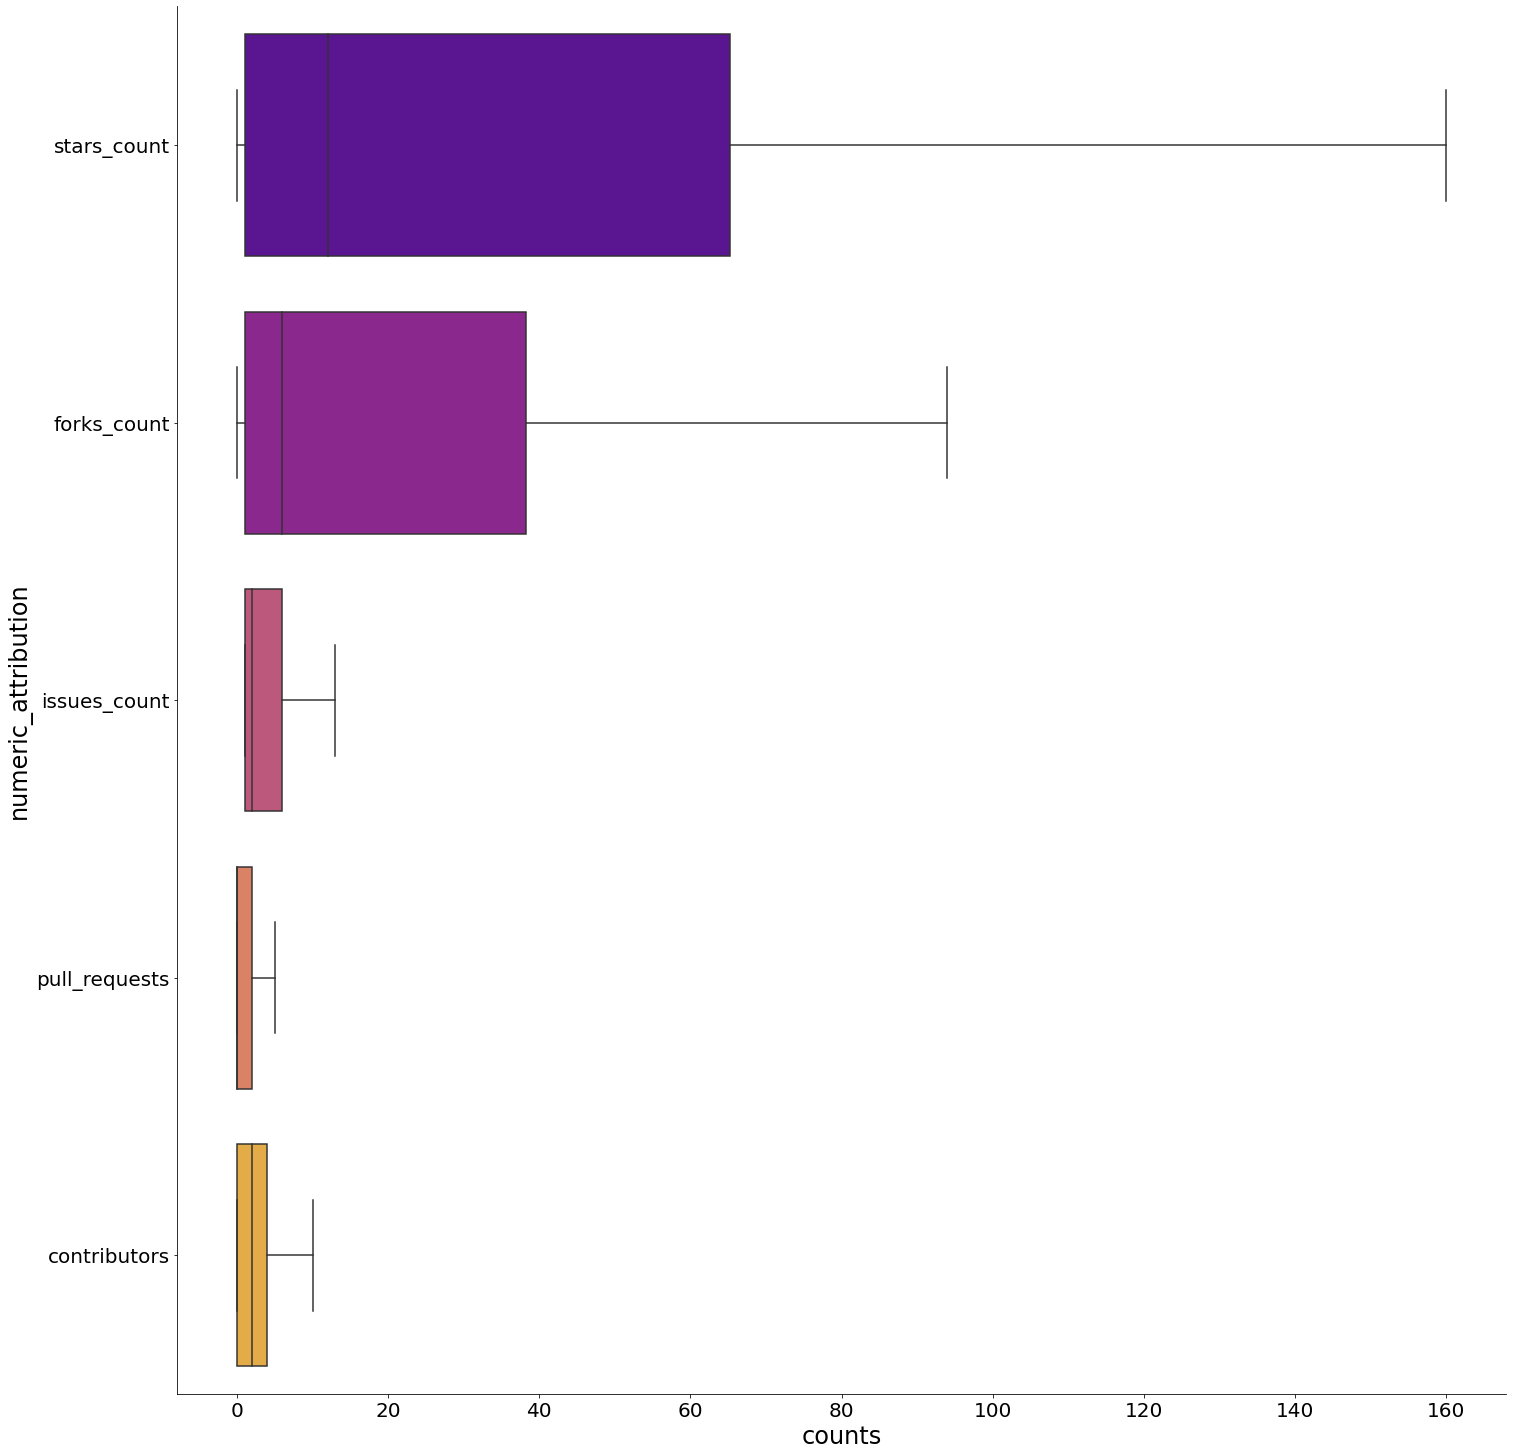

In [20]:
numeric_attribution_box = sns.catplot(data=numeric_counts, kind='box', y='numeric_attribution', x='counts', height=20, palette='plasma', sym='')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('numeric_attribution', fontsize=24, )
plt.xlabel('counts', fontsize=24)
plt.show()  #输出五个数值属性的盒图

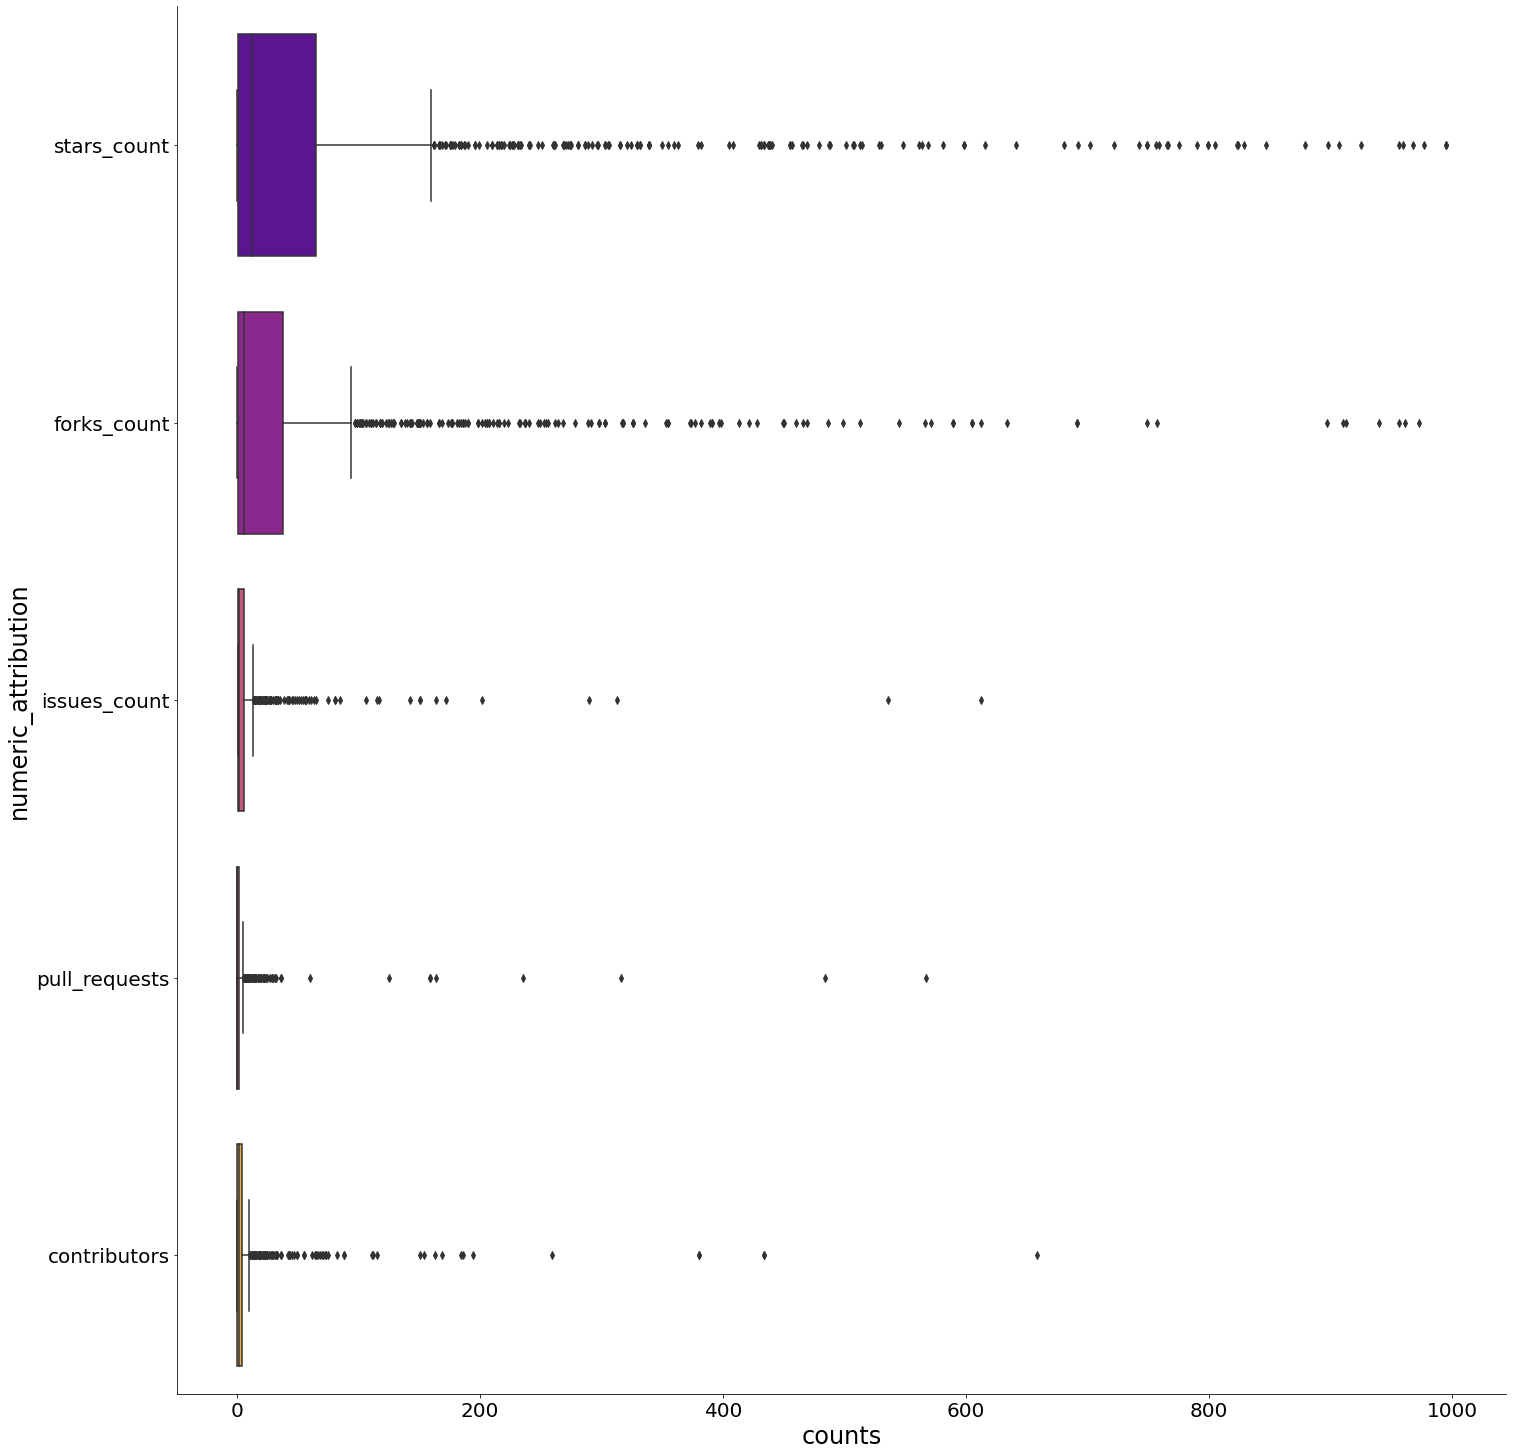

In [21]:
numeric_attribution_box = sns.catplot(data=numeric_counts, kind='box', y='numeric_attribution', x='counts', height=20, palette='plasma', sym='*')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('numeric_attribution', fontsize=24, )
plt.xlabel('counts', fontsize=24)
plt.show()  #输出五个数值属性的盒图及离群值

### 数据缺失的处理

观察数据集中缺失数据，分析其缺失的原因。分别使用下列四种策略对缺失值进行处理:

**将缺失部分剔除**

**用最高频率值来填补缺失值**

**通过属性的相关关系来填补缺失值**

**通过数据对象之间的相似性来填补缺失值**

注意：在处理后完成，要对比新旧数据集的差异。

**观察得到，仅language标签存在一定的数据缺失情况。**

#### 将缺失部分剔除

删除含有缺失值的行

In [22]:
github_data.isnull()

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1047,False,False,False,False,False,False,False
1048,False,False,False,False,False,False,False
1049,False,False,False,False,False,False,False
1050,False,False,False,False,False,False,False


In [23]:
github_data_cleaned = github_data.dropna()
github_data_cleaned

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
5,shobhit97/open-gpstracker,0,0,172,0,3,Java
6,donnemartin/system-design-primer,0,0,164,164,115,Python
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


#### 用最高频率值来填补缺失值

将缺失值填补为出现频率最高的语言

In [24]:
github_data_highfrequency = github_data.replace(np.nan, language_counts.index[0])
print('{}是频率最高语言。'.format(language_counts.index[0]))
github_data_highfrequency

JavaScript是频率最高语言。


,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language
0,octocat/Hello-World,0,0,612,316,2,JavaScript
1,EddieHubCommunity/support,271,150,536,6,71,JavaScript
2,ethereum/aleth,0,0,313,27,154,C++
3,localstack/localstack,0,0,290,30,434,Python
4,education/classroom,0,589,202,22,67,Ruby
...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,Dart
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,HTML
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,Python
1050,gwmccubbin/voting_dapp,11,5,1,0,0,JavaScript


#### 通过属性的相关关系来填补缺失值

属性相关关系填补缺失值

In [25]:
github_onehot = pd.get_dummies(github_data, columns=['language'], dummy_na=True, drop_first=True) #为language创建独热编码，缺失1不缺失0
github_onehot

,repositories,stars_count,forks_count,issues_count,pull_requests,contributors,language_Assembly,language_AutoHotkey,language_C,language_C#,...,language_Shell,language_Smarty,language_Solidity,language_SourcePawn,language_Svelte,language_Swift,language_TypeScript,language_Vim Script,language_Vue,language_nan
0,octocat/Hello-World,0,0,612,316,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,EddieHubCommunity/support,271,150,536,6,71,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,ethereum/aleth,0,0,313,27,154,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,localstack/localstack,0,0,290,30,434,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,education/classroom,0,589,202,22,67,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,Tyriar/canvas-astar.dart,2,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048,ankitkumar70777/github-slideshow,0,0,1,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1049,aitikgupta/interactive_cpu_scheduler,0,5,1,1,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1050,gwmccubbin/voting_dapp,11,5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Correlation Analysis')

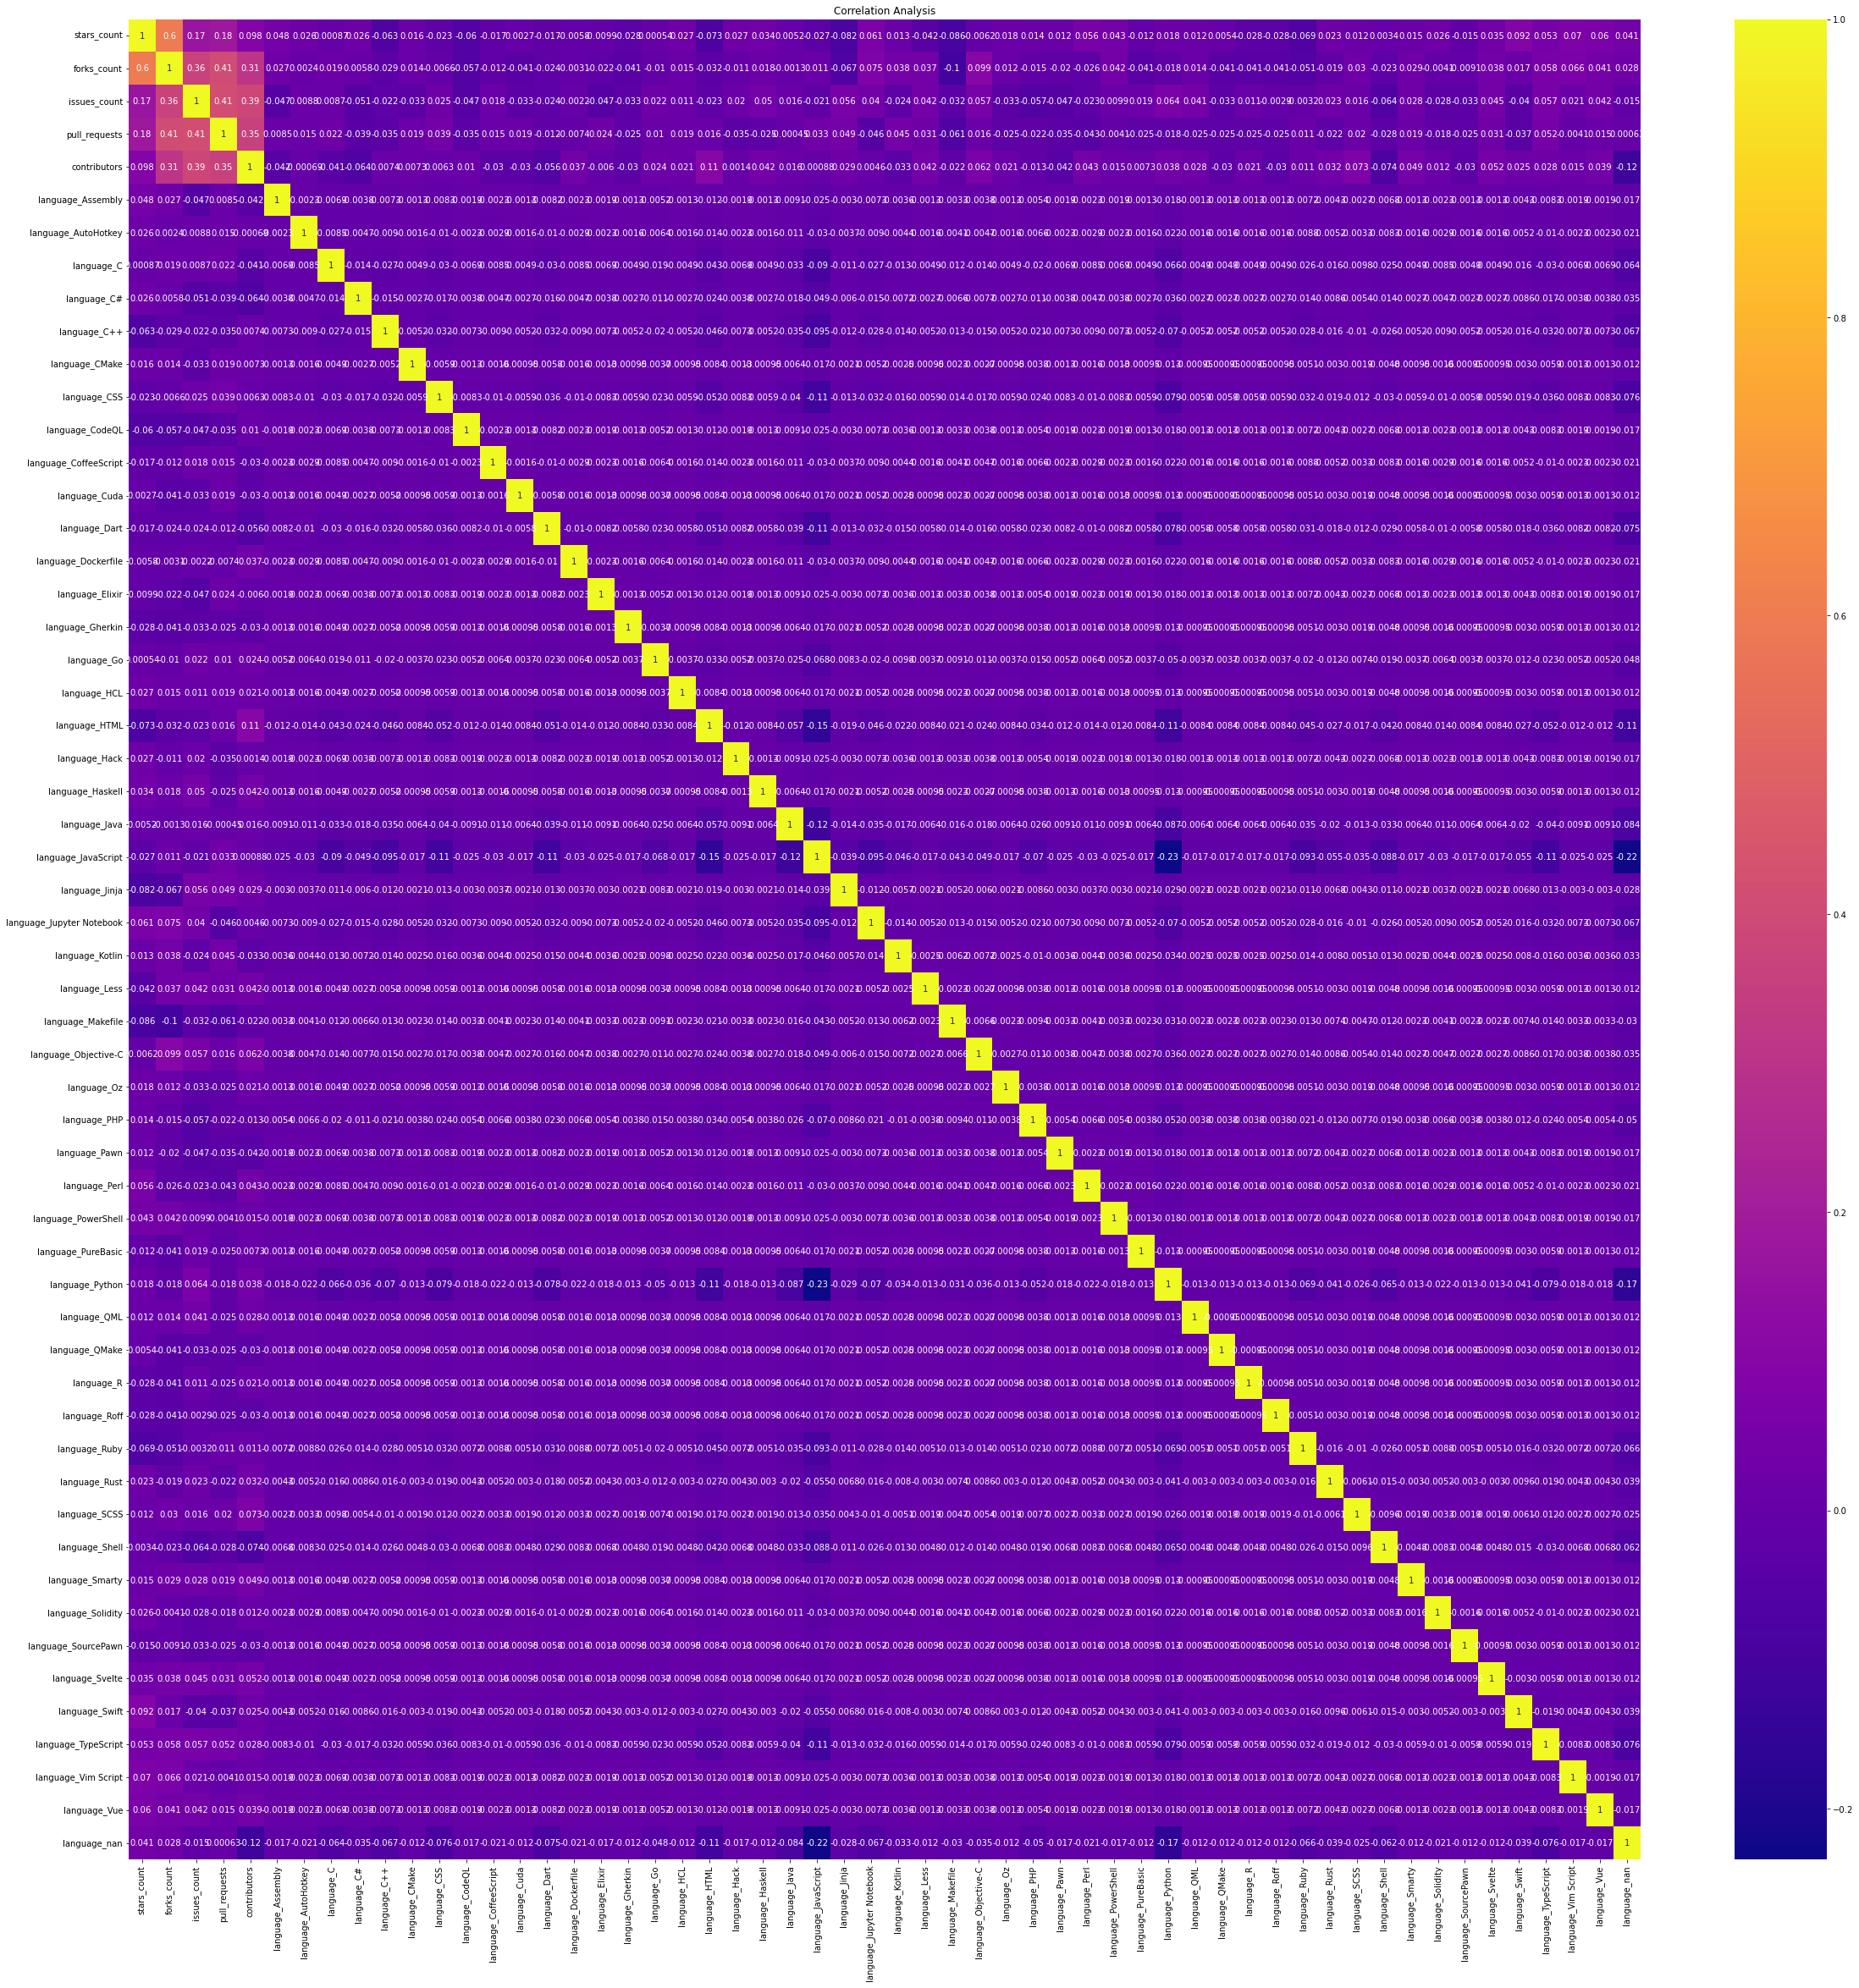

In [26]:
plt.figure(figsize=(40, 40))
sns.heatmap(github_onehot.corr(method='spearman'), cmap='plasma', annot=True)
plt.title('Correlation Analysis')  #绘制热图展示语言和数值属性之间的相关性，斯皮尔曼相关系数衡量

可以观察到language和数值属性之间的相关性较差。

In [27]:
from numpy import nan
github_data_copy = github_data
language_star = github_data_copy.groupby('language').agg(stars_average=('stars_count', 'mean')) #按language进行分组并聚合stars_count均值
for i in range(len(github_data_copy)):
    if github_data_copy['language'].iloc[i] is nan:
        rate = github_data_copy['stars_count'].iloc[i]
        dist = []
        for j in range(len(language_star)):
            dist.append(abs(language_star.iloc[j]['stars_average']-rate))
        idx = dist.index(min(dist))
        github_data_copy['language'].iloc[i] = language_star.index[idx]   #根据缺失值所在行的stars_count值，找到与之最接近的平均值，并将其对应语言填充为缺失值
github_data_copy['language'].value_counts()   #展示填充缺失值后每种语言的数量

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3744\4246934507.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  github_data_copy['language'].iloc[i] = language_star.index[idx]   #根据缺失值所在行的stars_count值，找到与之最接近的平均值，并将其对应语言填充为缺失值


JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
PHP                  17
Go                   17
Perl                 14
ActionScript         12
Swift                10
Rust                 10
C#                   10
Kotlin               10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Cuda                  7
Gherkin               7
SCSS                  7
Makefile              6
SourcePawn            6
AutoHotkey            5
QMake                 5
Jinja                 5
Assembly              4
PureBasic             4
Hack                  4
QML                   3
CMake                 3
Dockerfile            3
HCL                   3
Solidity              3
Elixir          

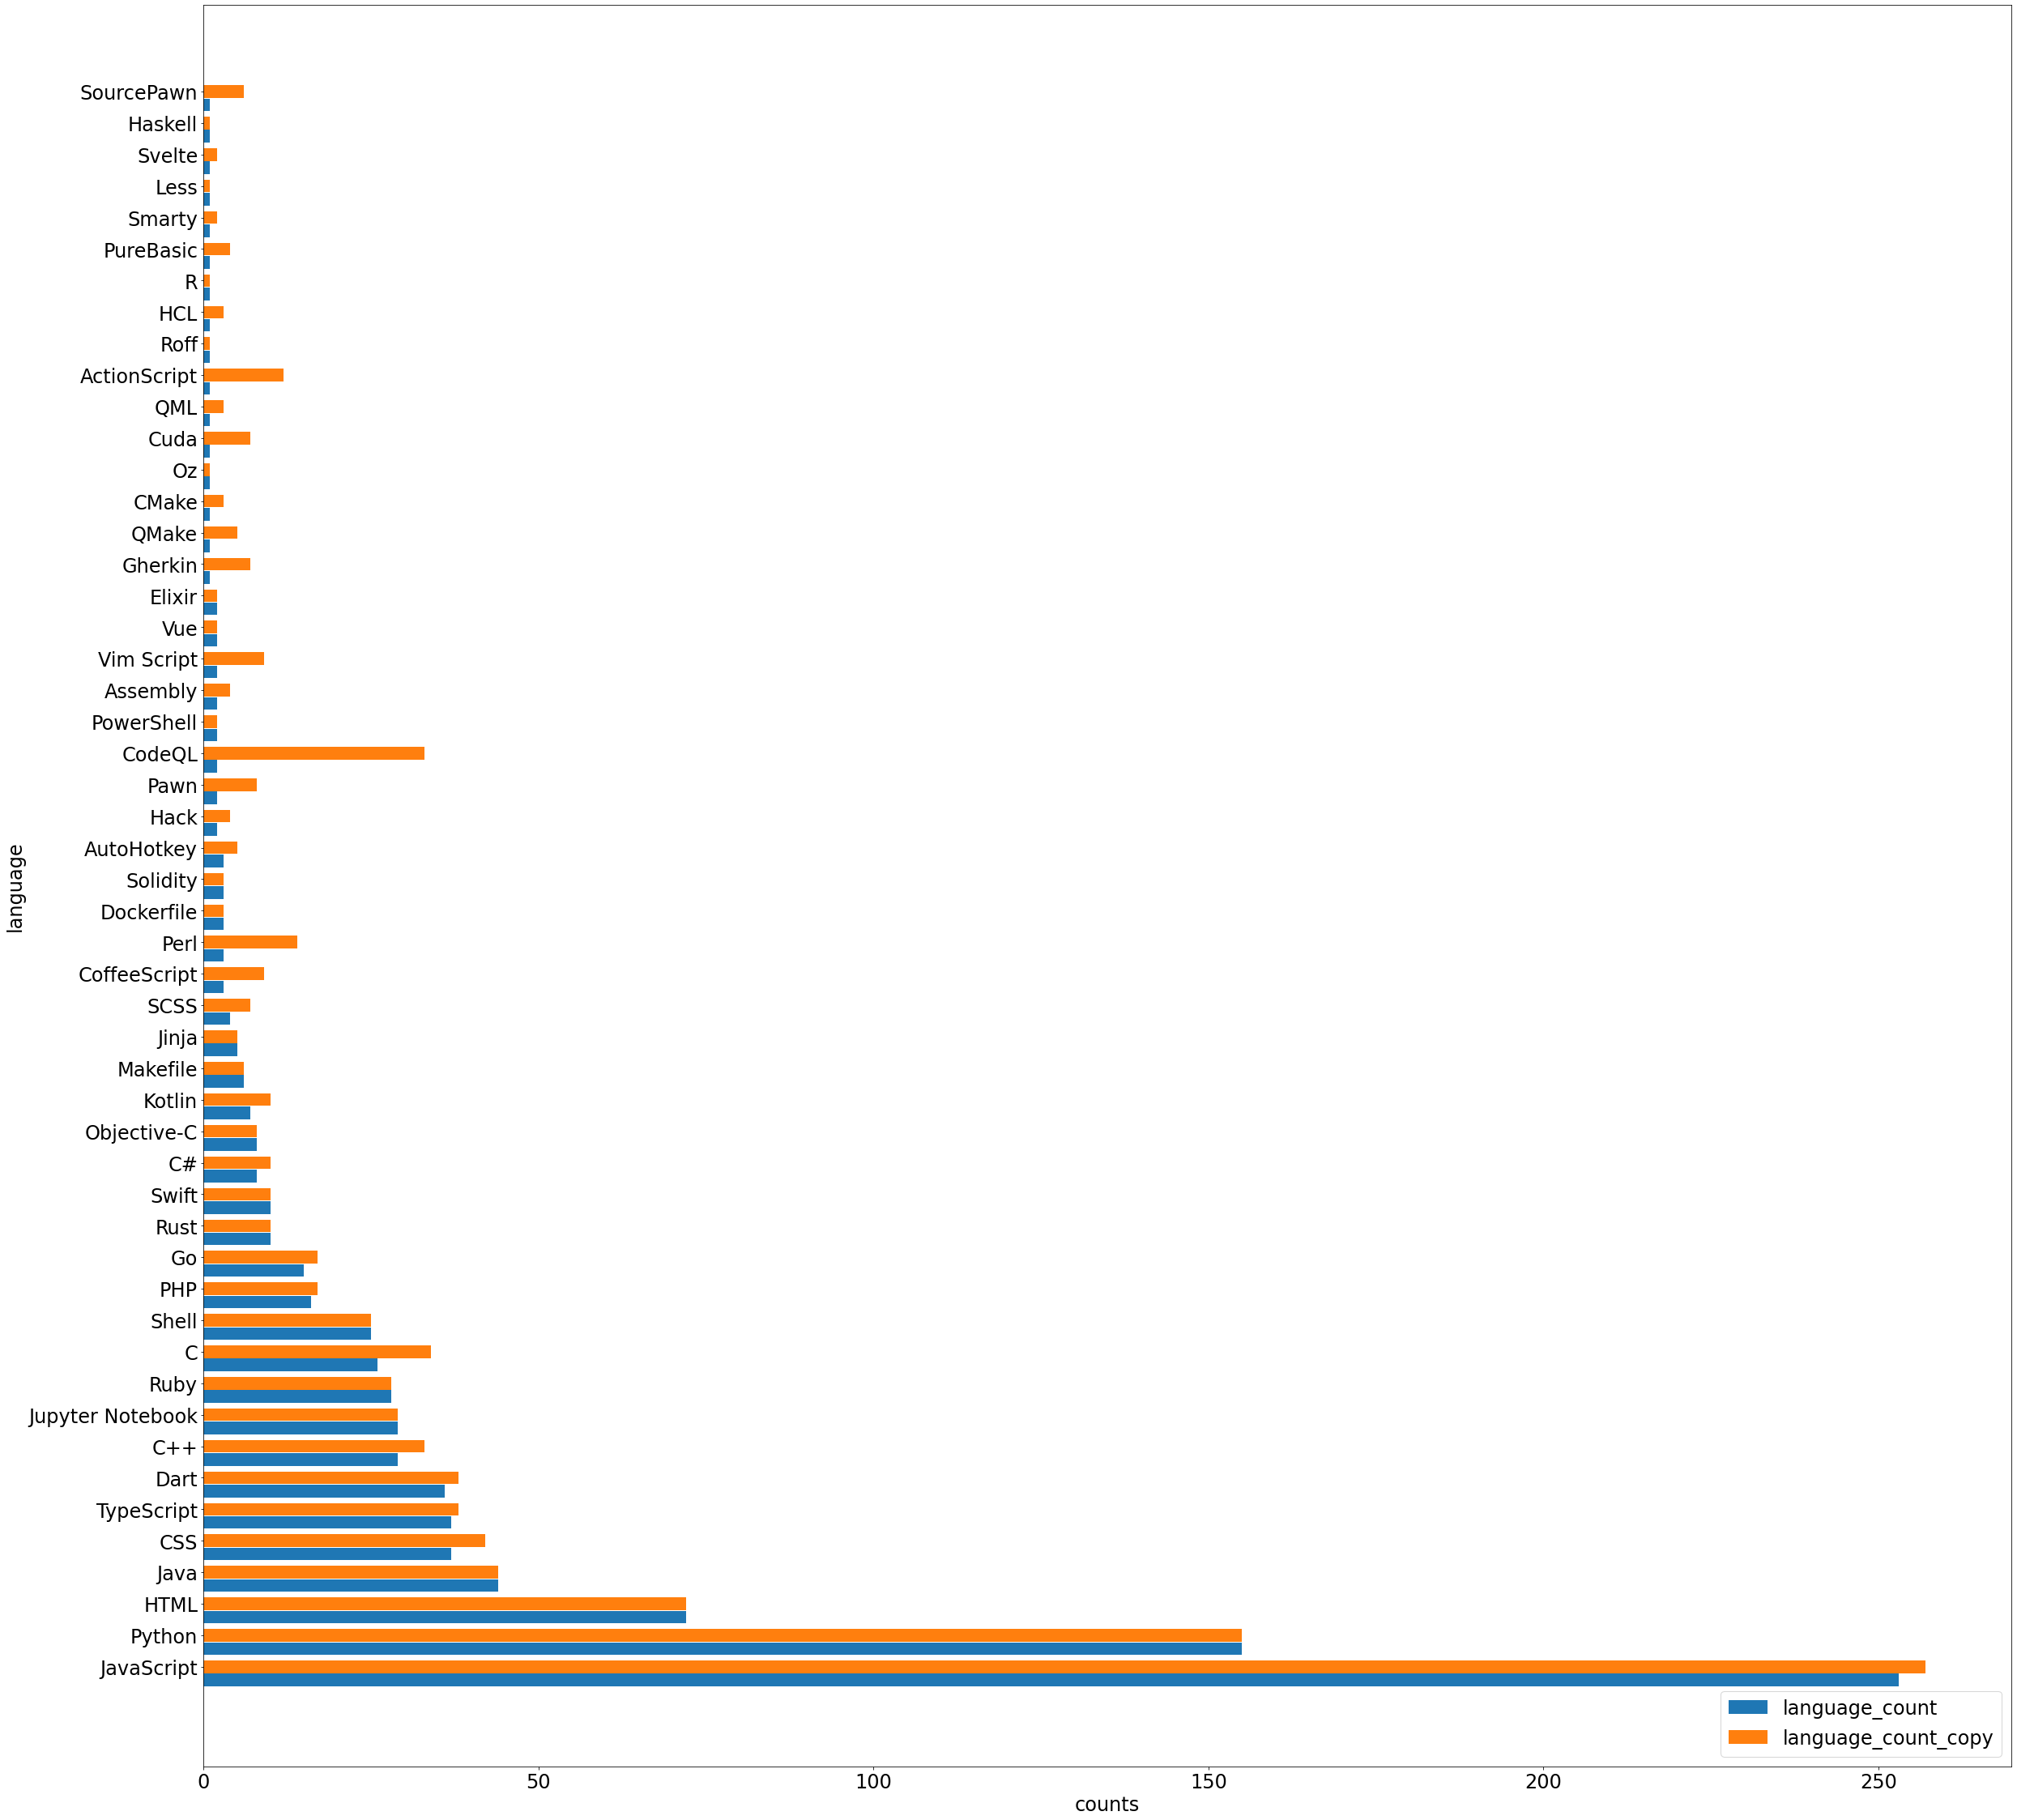

In [28]:
language_count_copy = language_counts
language_count_copy['language_count_copy'] = [0] * len(language_counts)

for level in list(language_counts.index):
    if level in list(github_data_copy['language'].value_counts().index):
        language_count_copy.loc[[level], ['language_count_copy']] = github_data_copy['language'].value_counts().loc[[level]].values[0]
        
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(language_count_copy))), tick_label=language_count_copy.index, width=language_count_copy['language_count'], label='language_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(language_count_copy)))], tick_label=language_count_copy.index, width=language_count_copy['language_count_copy'], label='language_count_copy', height=0.4)
plt.ylabel('language', fontsize=24)
plt.xlabel('counts', fontsize=24)
plt.legend(fontsize=24, loc='lower right')
plt.show()     #显示原始数据中每种语言的数量和填充缺失值后的每种语言的数量对比图。

可以观察到填充缺失值后数据比初始数据更加平滑，但与初始数据的分布差异较大。可以得出由于language和数值属性的相关性较差，采用该方法填充缺失值后效果并不很好。

#### 通过数据对象之间的相似性来填补缺失值

通过数据对象之间的相似性来填补缺失值

In [29]:
github_data_copy1 = github_data
def regularit(dataframe):
    new_dataframe = pd.DataFrame(index=dataframe.index)
    columns = ['stars_count', 'forks_count', 'issues_count', 'pull_requests', 'contributors']
    for c in columns:
        d = dataframe[c]
        MAX = d.max()
        MIN = d.min()
        new_dataframe[c] = ((d - MIN) / (d - MAX))
    return new_dataframe
normal_github_data = regularit(github_data_copy1)         #归一化数值属性
normal_language = pd.concat([normal_github_data, github_data_copy1['language']], axis=1)   #归一化后的数值属性与language拼接
infos = []
for i in range(len(normal_language)):
    info = []
    star = normal_language['stars_count'].iloc[i]
    fork = normal_language['forks_count'].iloc[i]
    issue = normal_language['issues_count'].iloc[i]
    pull = normal_language['pull_requests'].iloc[i]
    contributor = normal_language['contributors'].iloc[i]
    info.append(star)
    info.append(fork)
    info.append(issue)
    info.append(pull)
    info.append(contributor)
    infos.append(info)              #将normal_language中的数据逐行提取出来，并以二维列表的形式存储
for i in range(len(normal_language)):
    if normal_language['language'].iloc[i] is nan:
        dists = []
        for j in len(rates):
            dist = np.sqrt(np.sum(np.square(infos[i] - infos[j])))
            dists.append(dist)
        idx = dists.index(min(dists))
        github_data_copy1['language'].iloc[i] = github_data_copy1['language'].iloc[idx]   
github_data_copy1['language'].value_counts()   #计算欧氏距离，并将最接近行的language赋给缺失值

JavaScript          257
Python              155
HTML                 72
Java                 44
CSS                  42
Dart                 38
TypeScript           38
C                    34
CodeQL               33
C++                  33
Jupyter Notebook     29
Ruby                 28
Shell                25
PHP                  17
Go                   17
Perl                 14
ActionScript         12
Swift                10
Rust                 10
C#                   10
Kotlin               10
Vim Script            9
CoffeeScript          9
Pawn                  8
Objective-C           8
Cuda                  7
Gherkin               7
SCSS                  7
Makefile              6
SourcePawn            6
AutoHotkey            5
QMake                 5
Jinja                 5
Assembly              4
PureBasic             4
Hack                  4
QML                   3
CMake                 3
Dockerfile            3
HCL                   3
Solidity              3
Elixir          

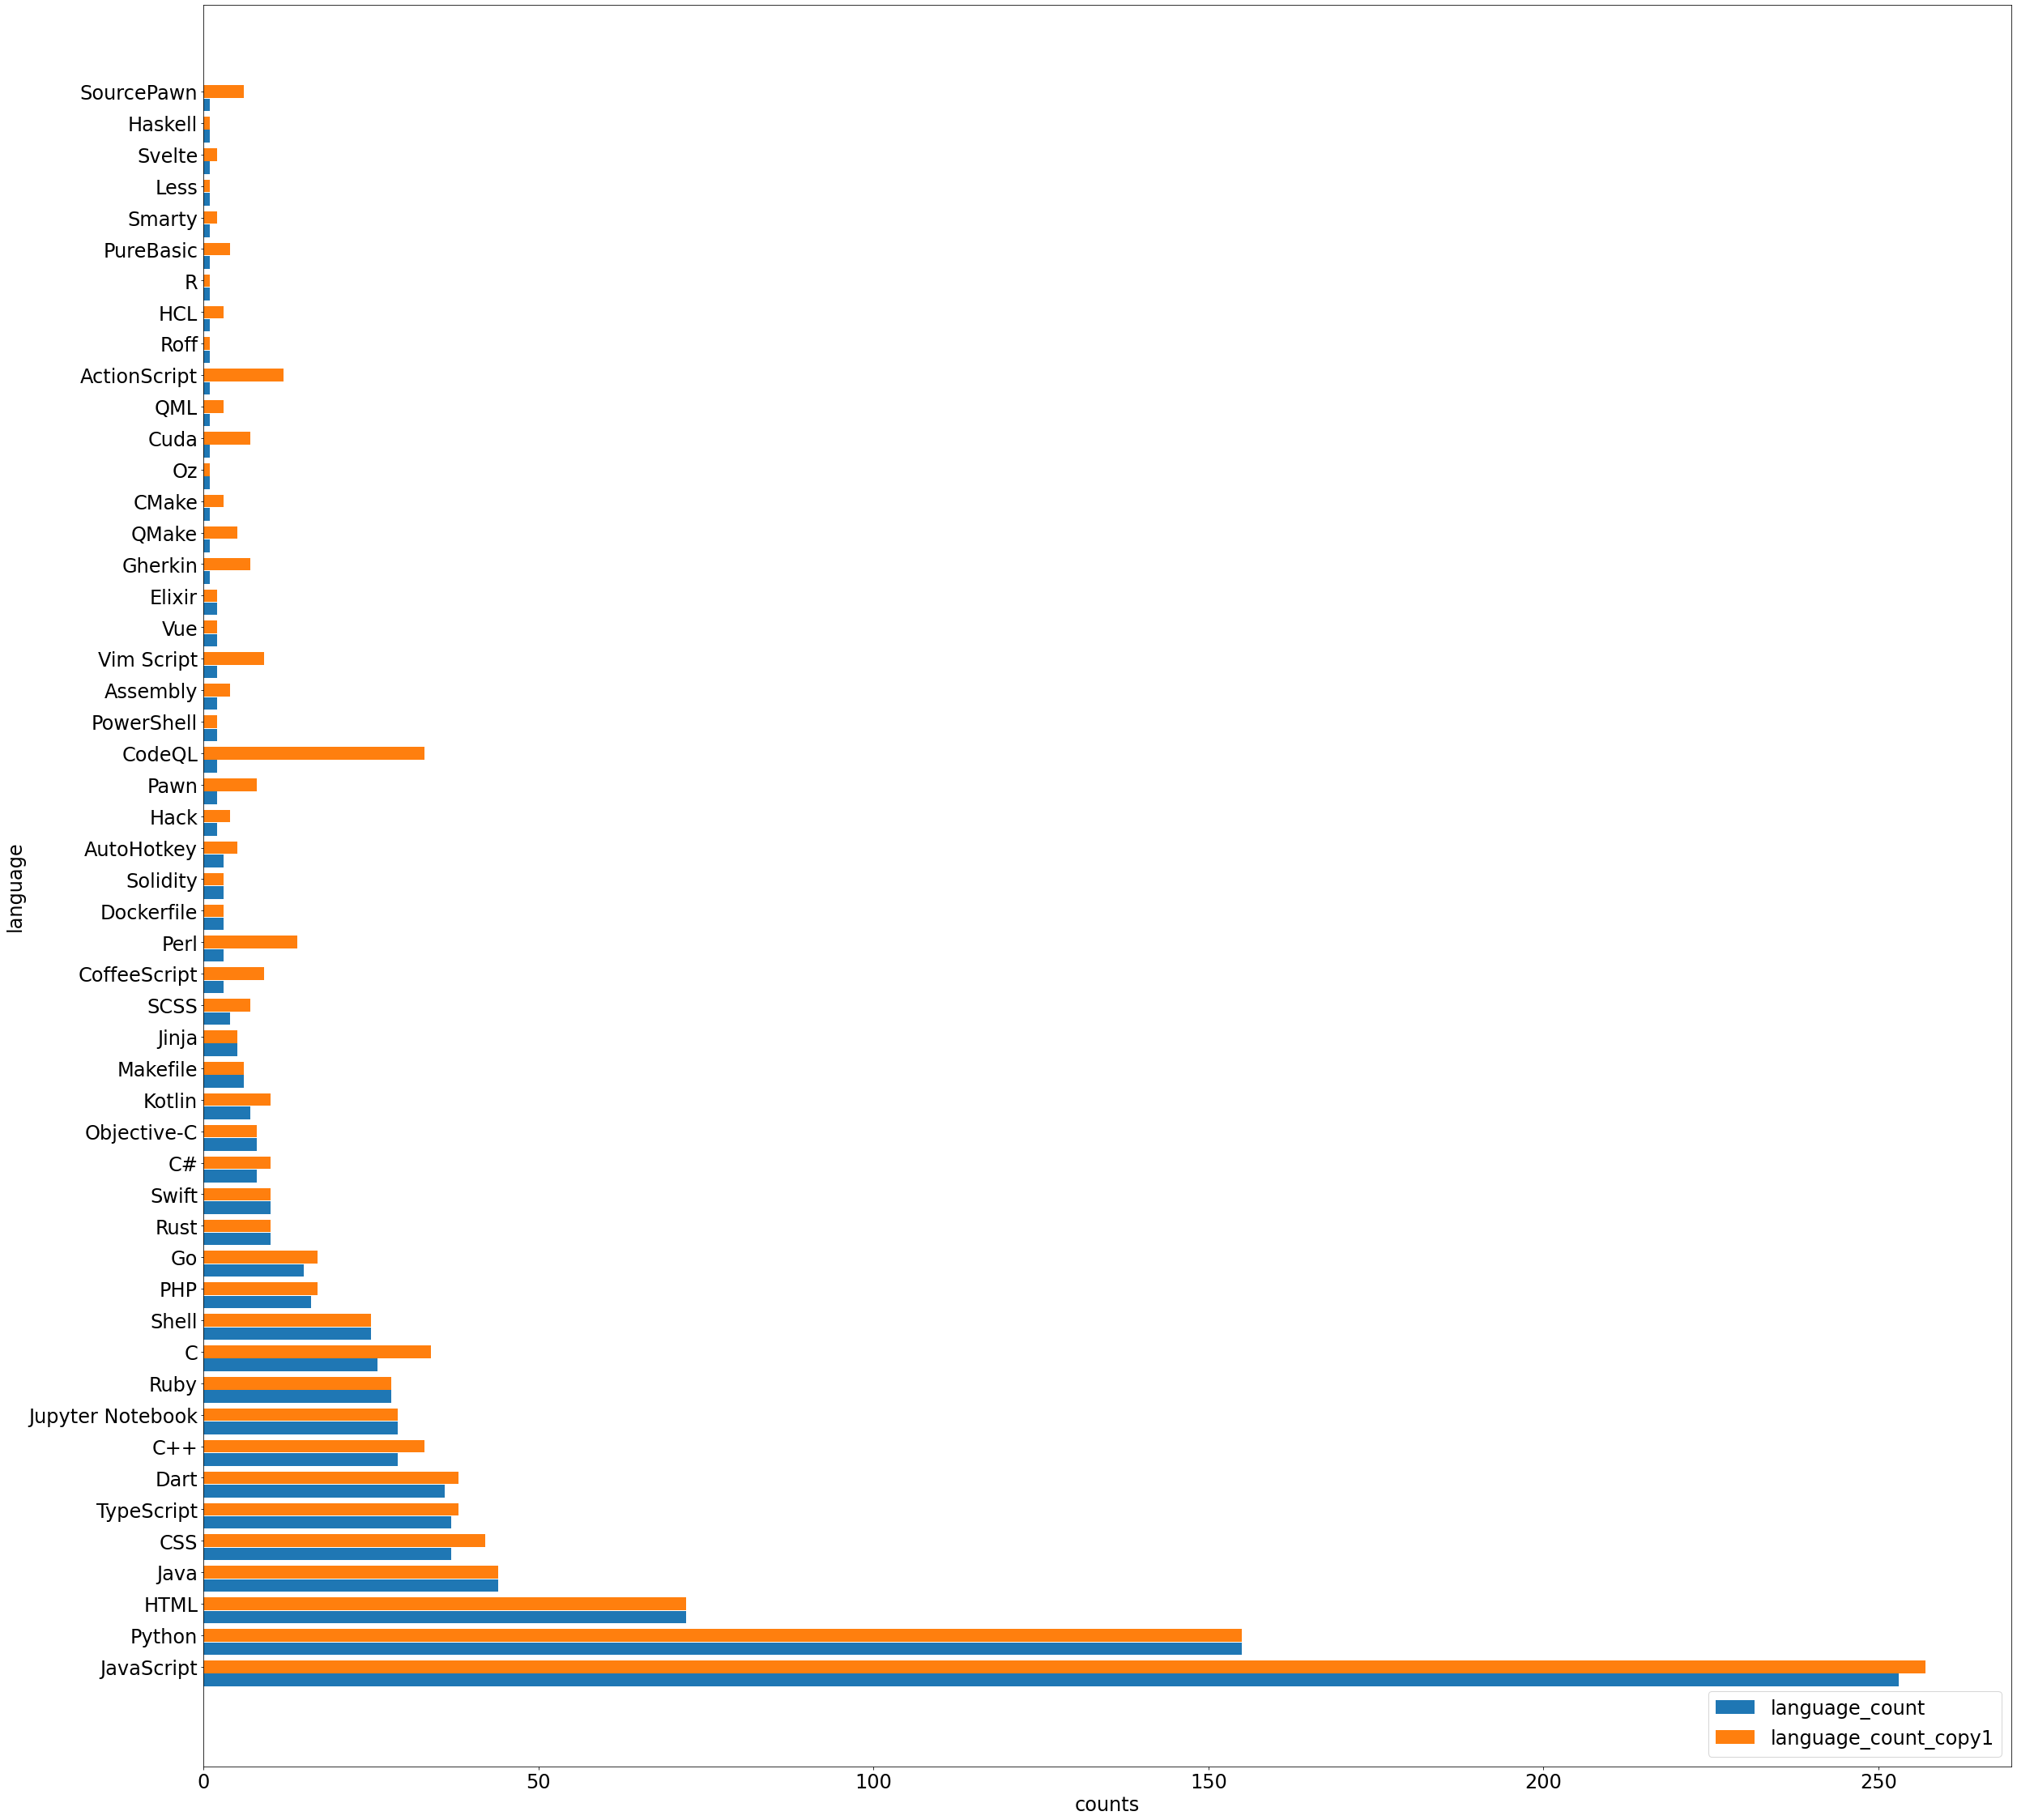

In [30]:
language_count_copy1 = language_counts
language_count_copy1['language_count_copy1'] = [0] * len(language_counts)

for level in list(language_counts.index):
    if level in list(github_data_copy1['language'].value_counts().index):
        language_count_copy1.loc[[level], ['language_count_copy1']] = github_data_copy1['language'].value_counts().loc[[level]].values[0]
        
plt.figure(figsize=(40, 40))
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
plt.barh(list(range(len(language_count_copy))), tick_label=language_count_copy1.index, width=language_count_copy1['language_count'], label='language_count', height=0.4)
plt.barh([d+0.42 for d in list(range(len(language_count_copy1)))], tick_label=language_count_copy1.index, width=language_count_copy['language_count_copy1'], label='language_count_copy1', height=0.4)
plt.ylabel('language', fontsize=24)
plt.xlabel('counts', fontsize=24)
plt.legend(fontsize=24, loc='lower right')
plt.show()   #显示原始数据中每种语言的数量和填充缺失值后的每种语言的数量对比图。

可以观察到这与通过属性相关性填充缺失值的方法填充缺失值后的数据相似度很高，都是比初始数据更加平滑，但与初始数据的分布差异较大。这是由于欧氏距离和数值属性相关性高度相关，用两种方法来根据相关性填充缺失值时填充后的数据集较为相似，同时它们与language的相关性较差，填充缺失值的效果并不是很好。